**Preprocessing**

In [12]:
#code only given for reference, the split corpus is already provided in the data zip
import os
import shutil
import xml.etree.ElementTree as ET

source_dir = "Corpus"

dest_dir = "data"

year_ranges = {
    "2004-2008": range(2004, 2009),
    "2009-2013": range(2009, 2014),
    "2014-2018": range(2014, 2019),
    "2019-2023": range(2019, 2024)
}

In [ ]:
#code only given for reference, the split corpus is already provided in the data zip
#split corpus into 4 mini corpora
os.makedirs(dest_dir, exist_ok=True)

for folder_name in year_ranges.keys():
    os.makedirs(os.path.join(dest_dir, folder_name), exist_ok=True)

def extract_year(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        if root.tag == "book-part-wrapper":  
            year_element = root.find(".//year")
            if year_element is not None:
                return int(year_element.text)
    except Exception as e:
        print(f"Error processing {xml_file}: {e}")
    return None

for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".xml"):
            xml_file = os.path.join(root, file)
            year = extract_year(xml_file)
            if year is not None:
                for folder_name, year_range in year_ranges.items():
                    if year in year_range:
                        dest_folder = os.path.join(dest_dir, folder_name)
                        shutil.copy(xml_file, dest_folder)
                        break

In [13]:
#Run directly from here
#preprocessing: abbreviations replacement code
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def expand_abbreviations(text, abbreviations_dict):
    for abbr, expansion in abbreviations_dict.items():
        pattern = r'(?<!\w){}(?!\w)'.format(re.escape(abbr))
        text = re.sub(pattern, expansion, text, flags=re.IGNORECASE)
    return text

abbreviations = {
    "wai": "web accessibility initiative",
    "wie": "web information extraction",
    "www": "world wide web",
    "rdf": "resource description framework",
    "atk": "accessibility toolkit",
    "ally": "accessibility",
    "w3c": "world wide web consortium",
    "dom": "document object model",
    "xml": "extensible markup language",
    "uaag": "user agent accessibility guidelines",
    "html": "hypertext markup language",
    "wcag": "web content accessibility guidelines",
    "atag": "authoring tool accessibility guidelines",
    "kwcag": "korean web content accessibility guidelines",
    "dhtml": "dynamic hypertext markup language",
    "svg": "scalable vector graphics",
    "ict": "information and communication technology",
    "msaa": "microsoft active accessibility",
    "vi": "visual impairment",
    "rss": "rich site summary",
    "owl": "web ontology language",
    "css": "cascading style sheets",
    "ajax": "asynchronous javascript and extensible markup language",
    "swap": "semantic web application platform",
    "earl": "evaluation and report language",
    "tts": "text-to-speech",
    "ria": "rich internet application",
    "dtt": "discrete trial training",
    "aba": "applied behavior analysis",
    "aria": "accessible rich internet applications",
    "pdf": "portable document format",
    "nvda": "nonvisual desktop access",
    "axsjax": "accessibility asynchronous javascript and extensible markup language",
    "x3d": "extensible 3d",
    "sadie": "structural semantics for accessibility and device independence",
    "ims":" integrated management system",
    "genurc": "generation platform for personal and context-driven user interfaces",
    "daisy": "digital accessible information system",
    "qti" : "question and test interoperability",
    "vxml": "voice extensible markup language",
    "aac": "augmentative and alternative communication",
    "vnc": "virtual network computing",
    "html5": "hypertext markup language version 5",
    "lms" : "learning management system",
    "iso fdis 24751": "international organization for standardization final draft international standard 24751",
    "ios": "internet operating system",
    "nlp": "natural language processing",
    "webgl": "web graphics library",
    "pwa": "progressive web application",
    "mathjax": "mathematics javascript",
    "tesol": "teaching english to speakers of other languages",
    "azw": "amazon word",
    "wot": "web of things",
    "simplenlg": "simple natural language generation",
    "vip": "visually impaired person",
    "ocr": "optical character recognition",
    "e-pub3": "electronic publication version 3",
    "h97": "hypertext markup language 97",
    "nsga iii": "non-dominated sorting genetic algorithm iii",
    "mooc": "massive open online course",
    "enl": "english as a native language",
    "vod": "video on demand",
    "esl": "english as a second language",
    "ell": "english language learner",
    "api": "application programming interface",
    "nsga": "non-dominated sorting genetic algorithm",
    "qualweb": "quality web",
    "h48": "hypertext markup language 48",
    "mathml": "mathematical markup language",
    "pub3": "publication version 3",
    "hci": "human-computer interaction",
    "stem": "science, technology, engineering, and mathematics",
    "epub": "electronic publication",
    "hiid": "health induced impairments and disabilities", 
    "vips": "visually impaired persons",
    "adkar": "awareness, desire, knowledge, ability, reinforcement",
    "sta": "scanpath trend analysis",
    "ccs": "computing classification system",
    "wiy": "write it yourself",
    "accessible epub3": "accessible electronic publication version 3",
    "internet of things (iot)":"internet of things",
    "user - centred design ( ucd )":"user centered design",
    "higher education institutions ( heis )":"higher education institutions",
    "alt text":"alternative text",
    "central bank digital currency ( cbdc )":"central bank digital currency",
    "financial technology ( fintech )":"financial technology",
    "ase": "automated software engineering",
    "voicexml": "voice extensible markup language",
    "cms":"content management system",
    "xslt":"extensible stylesheet language transformations",
    "wdfad":"web design framework for improved accessibility for people with disabilities",
    "abcd sw":"autistic behavior and computer based didactic software",
    "ibm web developer perspective":"international business machines web developer perspective",
    "w4a camp report":"web for all camp report",
    "accdc enterprise application programming interface":"accessible collaborative cloud development environment enterprise application programming interface",
    "w4a":"web for all",
    "navcog":"navigation for the cognitively impaired",
    "mim":"multimodal interaction model",
    "w4a camp":"web for all camp",
    "iot":"internet of things",
    "oer websites":"open educational resources websites",
    "web of things (wot)": "web of things",
    "web app":"web application",
    "( urc ) framework":"universal remote console framework",
    "( nfr ) framework":"non functional requirements framework",
    "xhtml": "extensible hypertext markup language",
    "aat":"adaptive assistive technologies",
    "ibm":"international business machines",
    "dhh user":"deaf and hard of hearing user", 
    "bvi user": "blind and visually impaired",
    "asl":"american sign language", 
    "pos tag":"part of speech tag", 
    "gps":"global positioning system", 
    "usa":"united states of america",
    "ngo":"non governmental organisation",
    "acm chi":"association for computing machinery conference on human factors in computing systems",
    "aea": "accessibility evaluation assistant"
}

In [14]:
#preprocessing: synonym grouping code
from collections import Counter
import gensim.downloader as api
from sklearn.cluster import KMeans
import numpy as np

def identify_synonym_clusters(preprocessed_keywords, num_clusters=10):
    word_vectors = api.load("word2vec-google-news-300")

    keyword_vectors = []
    keyword_indices = []
    for i, keyword in enumerate(preprocessed_keywords):
        word_vectors_subset = [word_vectors[word] for word in keyword.split() if word in word_vectors.index_to_key]
        if word_vectors_subset:
            keyword_vector = np.mean(word_vectors_subset, axis=0) 
            keyword_vectors.append(keyword_vector)
            keyword_indices.append(i)

    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0).fit(keyword_vectors)
    clusters = kmeans.labels_
    
    synonym_clusters = {}
    for cluster_id in np.unique(clusters):
        cluster_keyword_indices = [idx for idx, c in zip(keyword_indices, clusters) if c == cluster_id]
        cluster_keywords = [preprocessed_keywords[i] for i in cluster_keyword_indices]
        
        n_gram_counts = Counter(cluster_keywords)
        representative_n_gram = max(n_gram_counts, key=n_gram_counts.get)
        if len(cluster_keywords) > 1:
            synonym_clusters[representative_n_gram] = set(cluster_keywords)
    
    return synonym_clusters

def replace_synonyms(keywords, synonym_clusters):
    for center, synonyms in synonym_clusters.items():
        for i, keyword in enumerate(keywords):
            if keyword.lower() in [synonym.lower() for synonym in synonyms]:
                keywords[i] = center
    return keywords

synonyms = {
 "blind": {"blind", "blind user", "blindness","blind low vision user","blind low vision","blind programmer", "blind runner","non visual","blind people","nonvisual","navigation assistance people visual impairment blindness","blind visually impaired", "visual impairment blindness","game blind player","blind accessibility","blind navigation","nonvisual accessibility","blind person","blind visually impair runner","blind visually impair musician","blind visually impair people","blind gamer","blind participant", "blind musician", "blind individual","blind mobile device user"},
 "visually impaired":{"visually impaired","visual disability","cognitive visual impairment","visually impair student","visual impairment user", "visual impairment","vision impairment","people visual impairment", "person visual impairment","visually impair person","visually impair people","visually impair user","visually impair access","visually","visually impair individual","visually impair audience","visually impair traveler","visual impaired people", "visually impair learner", "visual impaired", "visually impair adult","visual impaired user", "visually impair citizen", "visually impair participant"}, 
 "web": {"web", "web system", "web base", "world wide web", "world wide telecom web", "mobile web","web technology","world web"},
 "web browser": {"browser", "web browser", "browse web service","modern web browser", "chrome web browser","saswat web browser", "firefox web browser"},
 "web application": {"web application", "progressive web application","web service"},
 "web content": {"web content", "web page", "web page element", "website", "web composition","online information","web page structure","web text","web site","web document"},
 "web browsing": {"web browsing","web navigation","accessible web navigation"},
 "web content accessibility guidelines": {"web content accessibility guideline","web content accessibility guideline 2.0 section 508","section 508","web content accessibility guideline 1.0","guideline","web content accessibility guideline 2.0","web accessibility guideline","world wide web consortium web content accessibility guideline 2.0","web content accessibility guidelines","korean web content accessibility guideline 1.0","arabic web accessibility guideline","web content accessibility guideline 2.0 conformance","web accessibility standard","web content accessibility guideline 2.0 working draft", "web content accessibility guideline 2.0 guideline", "korean web content accessibility guideline", "exist web accessibility guideline"},
 "education": {"postsecondary education", "high education", "education", "inclusive education", "computer science education", "online education", "literacy education", "health education","science technology engineering mathematic education","online high education","tertiary education","remote education","computer base vocational training","highschool mathematical education","online health education"},
 "training": {"vocational training", "industry training", "worker training", "workplace training",  "accessibility training"},
 "web accessibility": {"accessible website","web access","website accessibility", "web accessibility kuwait", "practitioner researcher web accessibility","accessible browsing","universal web accessibility","web accessibility","web inclusion","semantic web web accessibility","holistic web accessibility", "mobile web accessibility", "contextual web accessibility", "audio tactile web accessibility", "web page accessibility","affordable web accessibility", "accessible web"},
 "quality assessment": {"evaluation","test", "assessment", "quality assessment","functional testing", "automatic evaluation","traditional software testing", "automate evaluation", "quality assurance", "evaluation method", "evaluation system", "objective evaluation", "subjective evaluation", "web base assessment","markup evaluation","user evaluation", "scenario base evaluation", "monitor", "test efficiency", "review","quantitative evaluation","heuristic evaluation", "usability testing", "mobile evaluation", "accessibility evaluation", "experimental evaluation", "expert assessment","quality assurance process"},
 "validity": {"validation", "validity","appropriateness", "efficacy", "effectiveness", "correctness"},
 "compliance": {"compliance", "conformance", "conformance testing", "acceptance testing", "certification", "verification","conformance evaluation"},
 "accessibility evaluation": {"accessibility evaluation", "accessible examination", "accessible evaluation", "automatic accessibility evaluation", "accessibility assessment", "personalise accessibility assessment", "device tailor evaluation"},
 "usability testing": {"usability testing", "usability evaluation"},
 "universal design": {"universal design", "universal design learn"},
 "user centred design": {"user centred design", "user centre design", "human center design","user center design"}, 
 "content adaptation": {"adaptation", "content adaptation", "adaptation web content", "web content adaptation","transform content", "adapt web content"},
 "extensible markup language": {"extensible markup language", "extensible markup language document", "voice extensible markup language", "extensible markup language language", "extensible markup language content","extensible markup language feature","extensible voice extensible markup language dialog interface","extensible markup language technology"},
 "asynchronous javascript extensible markup language": {"accessibility asynchronous javascript extensible markup language","asynchronous javascript extensible markup language live region","asynchronous javascript extensible markup language time machine","asynchronous javascript extensible markup language technology","accessibility asynchronous javascript extensible markup language framework code", "asynchronous javascript extensible markup language drive variant", "asynchronous javascript extensible markup language application", "underlying accessibility asynchronous javascript extensible markup language technology","asynchronous javascript extensible markup language toolkit", "asynchronous javascript extensible markup language architecture","accessibility asynchronous javascript extensible markup language framework"},
 "hypertext markup language": {"hypertext markup language", "hypertext markup language tidy", "dynamic hypertext markup language", "hypertext markup language version", "hypertext markup language version medium player", "audio hypertext markup language version", "hypertext markup language content","hypertext markup language version video element","hypertext markup language document", "hypertext markup language element","hypertext markup language version video tag","valid hypertext markup language code","hypertext markup language version element", "hypertext markup language code","accessible hypertext markup language","hypertext markup language document object model tree"},
 "mathematical markup language": {"mathematical markup language","content mathematical markup language"},
 "readability": {"legibility", "readability"},
 "caption": {"subtitle","accurate caption"},
 "disambiguation":{"disambiguation", "semantic analysis", "semantic taxonomy"},
 "text simplification": {"text simplification", "automatic text simplification", "lexical simplification"},
 "text annotation": {"annotation", "semantic annotation"},
 "text explanation": {"text explanation", "definition"},
 "senior citizen": {"old adult","old people","elderly people","old reader","old user","elderly","elderly user"},
 "wearable technology": {"wearable technology", "wearable device", "wearable","wearable computing"}, 
 "haptic accessibility": {"haptic glove","haptic", "tactile","haptic exploration accessibility","haptic interaction","haptic navigation"},
 "touchscreen" : {"touchscreens", "touchscreen","touchscreen device"},
 "data representation": {"datum representation", "open datum"},
 "data visualisation:": {"datum visualization","accessible datum visualization"},
 "universal access": {"universal usability", "universal access"},
 "autism": {"autism ontology", "autism"},
 "inclusion": {"inclusion", "economic inclusion", "social inclusion", "digital inclusion"},
 "braille": {"braille", "nemeth braille","braille cell"},
 "accessible games": {"unity game accessibility", "accessible game", "accessible game design","accessibility game"},
 "motor impairment": {"mobility impairment", "motor impairment"},
 "learning or reading disability": {"dyslexia","learn disability","read disability","developmental learning disorder", "print disability"}, 
 "cloud computing": {"cloud computing","virtual network computing", "ubiquitous cloud computing","cloud mobile computing","cloud computing paradigm"},
 "design": {"visual design", "web design", "learn design", "contextual design","screen design", "user interface design","design","accessible design", "interface design", "accessibility design", "participatory design","universal design", "accessible wearable technology design", "widget design", "inclusive design","responsive design", "designer preference","accessible interface design","system design","aspect orient design","iterative design", "cam design", "course design", "end design", "assistant design","specific design", "fabrication", "curriculum design", "original design"},
 "architecture": {"configuration","information architecture", "software architecture"},
 "screen reader": {"mobile screen reader","capti narrator","screen reader user","screen reader"},
 "alternative text": {"alternative content", "text alternative", "image text alternative","quality alternative text"},
 "web accessibility initiative": {"web accessibility initiative accessible rich internet application"},
 "user experience": {"user experience", "holistic user experience"},
 "user preference": {"learner preference", "user preference"},
 "accessibility tools": {"accessibility tool", "accessibility toolkit"},
 "accessibility barriers":{"accessibility barrier","barrier","exist accessibility barrier", "urban accessibility barrier", "accessibility barriers", "new accessibility barrier", "accessibility automation barrier", "accessibility information barrier"},
 "accessibility guidelines":{"accessibility standard","accessibility policy","accessibility guideline","accessibility requirement","available accessibility guideline"},
 "accessibility":{"universal access"},
 "accessibility training":{"accessibility training","accessibility education"},
 "user interface": {"abstract user interface","user interface elderly disabled","adaptable user interface","model base user interface","adaptive user interface","user interface model","pluggable user interface","mathematical user interface","conversational user interface","voice user interface","audio user interface","user interface", "design search engine user interface", "mobile interface", "interface"},
 "text to speech": {"text speech text speech", "text speech"},
 "javascript": {"javascript", "mathematics javascript"}, 
 "mobile device": {"smartphone", "mobile device", "tablet device","specific mobile device", "mobile phone", "cellular phone","phone", "tablet"},
 "user": {"user", "novice user"},
 "usability": {"physical usability", "usability"},
 "cognitive impairment": {"cognitive impairment", "intellectual disability","people intellectual disability","navigation cognitively impaired","cognitively impair people","cognitive disability", "cognitive accessibility"},
 "web 2.0": { "web 2.0 application", "web 2.0"}, 
 "deaf": {"deaf education", "deaf community"}, 
 "hearing impairment" :{"hear impairment"},
 "people": {"community", "people home", "people"},
 "people with disabilities": {"disabled people","people disability"},
 "situational impairment": {"situational impairment", "situational disability", "situationally induce impairment"},
 "physical impairment":{"physical impairment", "physical disability"},
 "organisational accessibility":{"workplace accessibility"},
 "semantic web": {"web semantic", "semantic web", "semantic web application platform","semantic web technology"},
 "universal accessibility": {"ubiquitous accessibility", "universal accessibility"},
 "parkinsons disease": {"parkinson disease progression", "parkinson disease"}, 
 "access": {"equal access", "access"},
 "screen reader": {"vox screen reader", "screen reader","general screen reader"}, 
 "virtual environment": {"virtual world","virtual environment"},
 "assistive technology": {"adaptive assistive technology"},
 "develop region": {"develop country"},
 "automatic identification": {"automatic topicalisation labelling", "automatic topicalisation", "automatic identification"},
 "javascript": {"javascript", "javascript code"},
 "gamification": {"gamification", "gamification technique"},
 "developer": {"professional developer", "developer"},
 "feature": {"featured functionality", "feature"},
 "fundamental": {"basic", "fundamental"},
 "universal usability study": {"universal usability study", "macro scale universal usability study"},
 "mismatch": {"mismatch", "disparity"},
 "disadvantage": {"disadvantage", "drawback"},
 "open problem": {"unsolved problem", "open problem"},
 "difficult problem": {"difficult problem", "challenging problem", "severe problem"},
 "shortcoming": {"shortcoming", "flaw"},
 "specific problem": {"specific problem", "specific difficulty"},
 "challenging issue": {"challenging issue", "challenging problem"},
 "evaluation tool": {"traditional evaluation tool", "evaluation tool", "automatic evaluation tool", "web accessibility evaluation tool"},
 "author tool accessibility guideline": {"author tool accessibility guideline", "tool accessibility guideline"},
 "content author": {"content author", "content provider"},
 "organisational process": {"business process", "organisational process"},
 "good practice": {"good practice", "publish good practice", "mainstream good practice"},
 "traditional iconic system": {"traditional iconic system", "exist iconic system"},
 "small fragment": {"small fragment", "small piece"},
 "vast range": {"broad range", "wide range", "vast range", "diverse range"},
 "metadata": {"metadata", "wikis"},
 "screen reader user": {"blind screen reader user", "blind partially sight screen reader user","screen reader user", "seven screen reader user", "blind partially sight screen reader user", "blind screen reader user", "remote screen reader user"},    
 "screen reader": {"screen reader narrator software program", "screen readers/ text reader narrator software program","screen reader software", "exist screen reader software", "screen reading software","modern screen reader", "regular screen reader", "advanced screen reader","robust interactive screen reader", "chinese screen reader", "mobile screen reader", "traditional screen reader", "exist screen reader", "screen reader program"},
 "integrate management system accessforall metadata": {"integrate management system accessforall metadata", "integrate management system accessforall metadata definition", "integrate management system accessforall metadata description"},
 "remote desktop": {"remote desktop", "virtual desktop"},
 "science technology engineering mathematics": {"science technology engineering mathematic content", "accessible science technology engineering mathematic content","science technology engineering mathematic","science technology engineering mathematic subject"},
 "test automation": {"test automation", "automate testing"},
 "key functionality": {"key functionality", "main functionality"},
 "adaptive technology": {"adaptive technology", "adaptive system"},
 "computer": {"computer", "personal computer", "networked physical computer"},
 "video conferencing tool": {"video conferencing tool", "online conferencing tool", "videoconferencing tool","videoconference software"},
 "capability": {"capability", "inherent capability"},
 "important issue": {"important issue","key issue", "critical issue", "big issue", "major issue"},
 "insight": {"great insight", "novel insight", "insight"},
 "need": {"current need", "carefully important need","need", "requirement","new need", "essential need", "persistent need","specific need","press need","distinct need","particular need"},
 "challenge": {"main challenge","research challenge", "technical challenge", "great challenge", "unique challenge", "complex challenge","significant challenge", "challenging obstacle", "challenging problem", "important challenge","central challenge","big challenge", "outstanding challenge", "major challenge","large challenge", "common challenge", "challenge", "contextual challenge","substantial challenge", "point challenge"},
 "improvement": {"improvement", "technological improvement", "significant improvement"},  
 "assistive technology": {"assistive technology solution", "usual assistive technology", "assistive device", "assistive tool"},
 "mobile device": {"familiar mobile device", "smart phone", "internet enable mobile device", "pocket sized mobile device", "child tablet", "exist smartphone", "small mobile device", "common mobile device", "current mobile device", "mobile", "cell phone","handheld device","portable small screen device","small screen device", "mobile searcher", "simple mobile phone", "handset"},
 "technique": {"tactic", "method", "procedure"},
 "prototype": {"prototype system", "prototype", "simple prototype"},
 "eye tracking": {"eye tracking study", "eye tracking","eye track datum"}, 
 "goal": {"original goal", "goal", "main goal"}, 
 "opportunity": {"chance", "opportunity"},
 "importance": {"great importance", "significance", "importance", "importance weight", "word importance"}, 
 "participant": {"participant", "single participant", "human participant"}
}

In [17]:
#preprocessing code 
def preprocess_text(text):
    doc = nlp(text.lower())     
    preprocessed_text = expand_abbreviations(' '.join([token.text for token in doc]), abbreviations)
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text)  # Remove extra white spaces
    preprocessed_text = ' '.join([token.lemma_ for token in nlp(preprocessed_text) if not token.is_stop and len(token.text) >= 3])
    return preprocessed_text

def extract_keywords(text):
    doc = nlp(text)
    keywords = [chunk.text for chunk in doc.noun_chunks]
    return keywords

def remove_italic_tags(element):
    if element is None:
        return ""
    text = ""
    for node in element.iter():
        if node.tag == "italic" and node.attrib.get("toggle") == "yes":
            if node.tail:
                text += node.tail
        else:
            if node.text:
                text += node.text
            if node.tail:
                text += node.tail
    return text

def extract_text_from_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()      
        kwd_group = root.find(".//book-part/book-part-meta/kwd-group")
        keywords = [kwd.text for kwd in kwd_group.findall("kwd")] if kwd_group is not None else []       
        preprocessed_keywords = [preprocess_text(keyword) for keyword in keywords if preprocess_text(keyword) != '']
        title_group = root.find(".//book-part/book-part-meta/title-group")
        title = remove_italic_tags(title_group.find("title"))
        title_keywords = [preprocess_text(keyword) for keyword in extract_keywords(title) if preprocess_text(keyword) != '']
        abstract = remove_italic_tags(root.find(".//book-part/book-part-meta/abstract/p"))
        abstract_keywords = [preprocess_text(keyword) for keyword in extract_keywords(abstract) if preprocess_text(keyword) != '']
        preprocessed_keywords.extend(title_keywords)
        preprocessed_keywords.extend(abstract_keywords)
        return preprocessed_keywords
    except Exception as e:
        print(f"Error processing {xml_file}: {e}")
    return []

keyword_sets = {}
synonym_clusters = []
document_keywords = {folder_name: [] for folder_name in os.listdir(dest_dir) if os.path.isdir(os.path.join(dest_dir, folder_name))}

for folder_name in os.listdir(dest_dir):
    folder_path = os.path.join(dest_dir, folder_name)
    if os.path.isdir(folder_path):
        keyword_set = []
        doc_count = 0 
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".xml"):
                    doc_count += 1 
                    xml_file = os.path.join(root, file)
                    keywords = extract_text_from_xml(xml_file)
                    keyword_set.extend(keywords)
                    document_keywords[folder_name].append(replace_synonyms(keywords,synonyms))
        keyword_set = replace_synonyms(keyword_set, synonyms)
        threshold = int(doc_count * 0.5)
        keywords_to_remove = set([keyword for keyword in keyword_set if keyword_set.count(keyword) > threshold])
        keyword_set = [keyword for keyword in keyword_set if keyword not in keywords_to_remove]
        for i, doc_keywords in enumerate(document_keywords[folder_name]):
            document_keywords[folder_name][i] = list(set(doc_keywords) - set(keywords_to_remove))
        filtered_keyword_set = {keyword:keyword_set.count(keyword) for keyword in keyword_set if keyword_set.count(keyword) <= threshold}
        keyword_sets[folder_name] = dict(sorted(filtered_keyword_set.items(), key=lambda x: x[1], reverse=True))
        #synonym_clusters.append(identify_synonym_clusters(keyword_set,80))

#the synonym grouping code can be uncommented to see the synonym clusters and for further grouping, uncomment the line above and the loop below, k value can also be changed - it is currently set to 80
"""
combined_dict = {}
for cluster in synonym_clusters:
    for key, value in cluster.items():
        unique_synonyms = set(value)
        if len(unique_synonyms) > 1:
            if key in combined_dict:
                combined_dict[key] = combined_dict[key].union(unique_synonyms)
            else:
                combined_dict[key] = unique_synonyms
print(combined_dict)
for folder_name, keyword_set in keyword_sets.items():
    print(f"Folder: {folder_name}")
    print(f"Number of unique keywords: {len(keyword_set)}")
    for keyword in keyword_set:
        print(keyword)
    print()
"""
print(document_keywords)
for folder_name, keyword_set in keyword_sets.items():
    print(f"Keyword set for folder '{folder_name}':")
    for keyword, count in keyword_set.items():
        print(f"{keyword}: {count}")
    print()

{'2004-2008': [['adesigner', 'practical way', 'designer', 'screen reader', 'exist site', 'law', 'page', 'well understanding', 'problem', 'section', 'alternative text', 'web designer', 'break skip navigation link', 'tool', 'inappropriate alt text', 'real world improvement', 'web accessibility adaptation', 'increase use', 'regulation', 'usability', 'accessibility effort', 'example', 'blind', 'real problem', 'people', 'disability experience', 'developer', 'skip navigation link', 'truly accessible usable page', 'world', 'image', 'underlie web accessibility', 'blind user perspective', 'home page reader', 'future direction', 'speed', 'voice browser', 'disability', 'overview', 'awareness', 'world wide web consortium web content accessibility guideline', 'historical progress', 'need', 'site'], ['web browser', 'fly', 'moment', 'user', 'text transcoder', 'subjective objective datum', 'disabled web user', 'experiment', 'wide population', 'disabled user', 'usability', 'impact', 'result', 'web serv

**Exploratory Analysis**

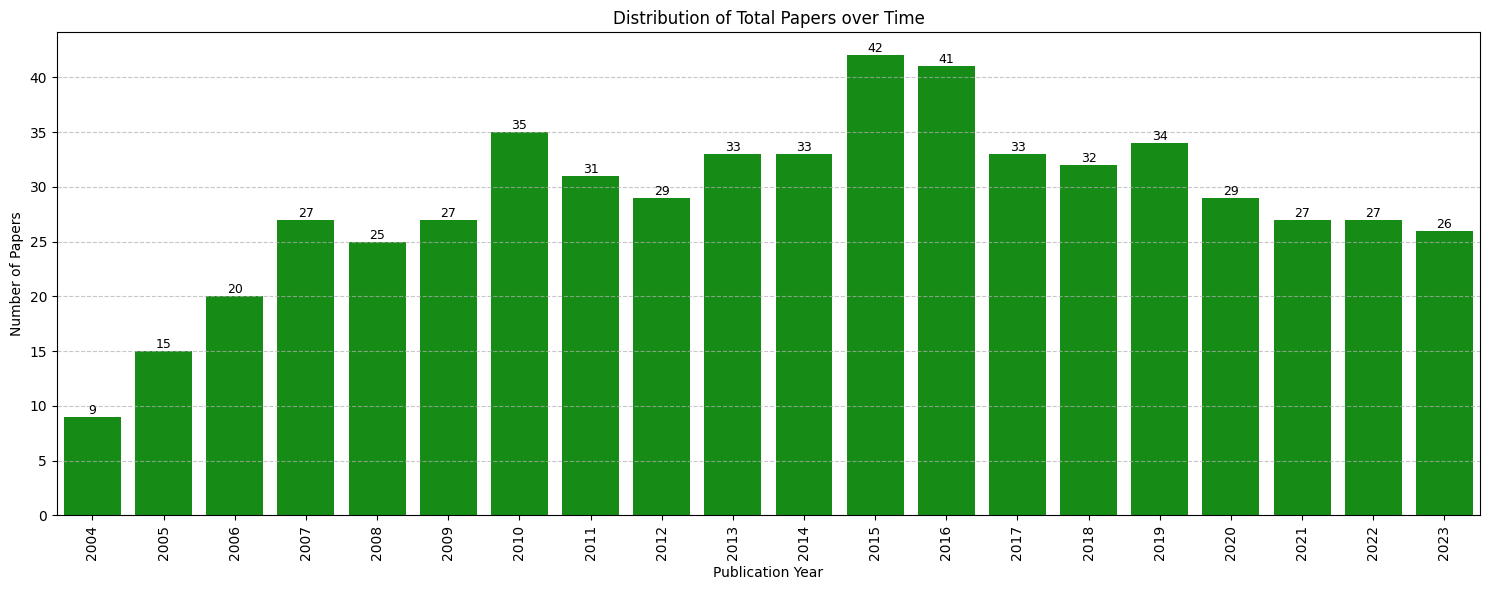

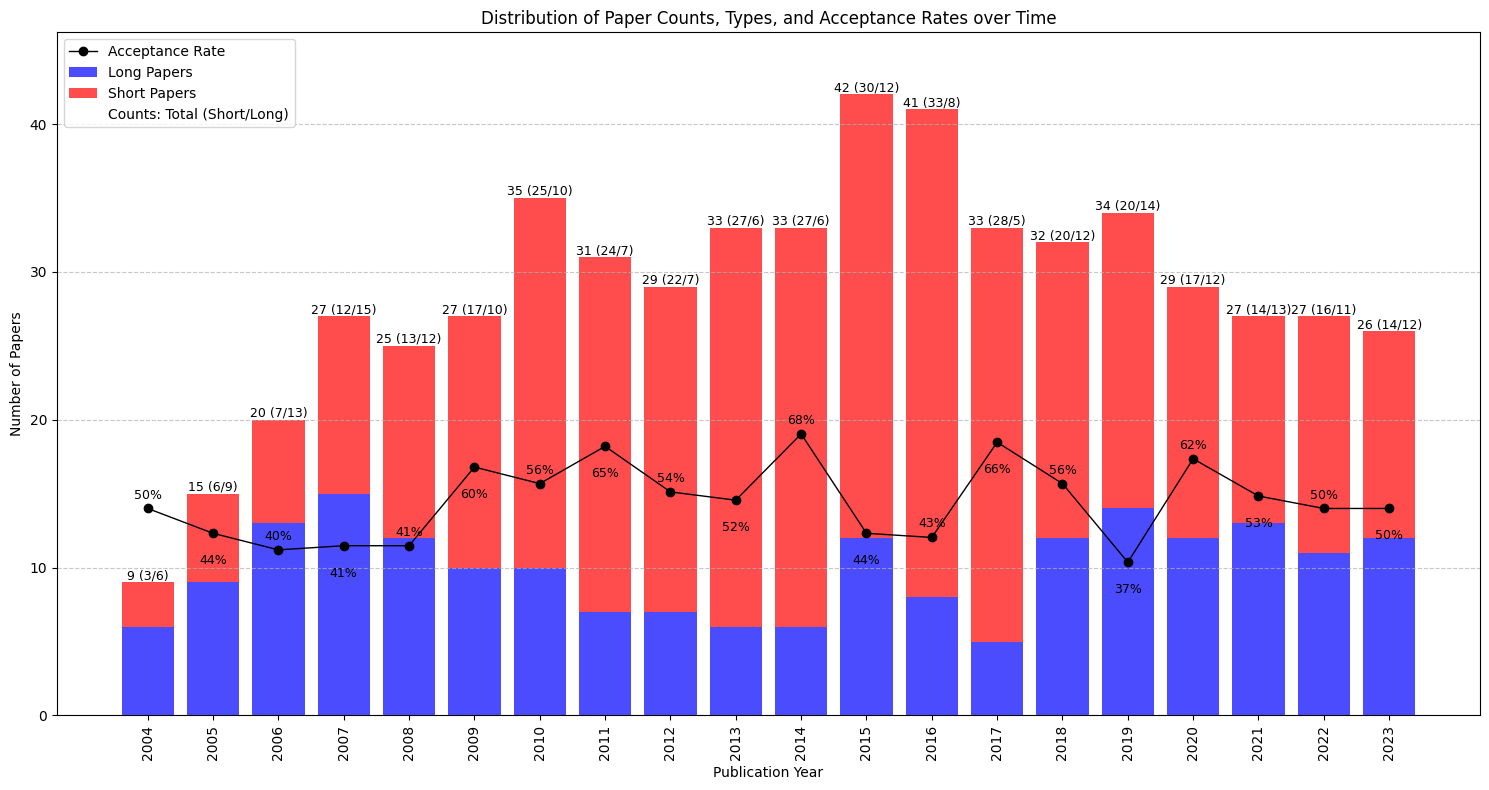

In [18]:
#exploratory analysis: descriptive statistics code
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_info_from_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()   
        year_element = root.find('.//book-part/book-part-meta/pub-date/year')
        year = int(year_element.text) if year_element is not None else None
        lpage = root.find('.//book-part-meta/lpage')
        fpage = root.find('.//book-part-meta/fpage')
        no_of_pages = (int(lpage.text) - int(fpage.text)) if root is not None and fpage is not None and lpage is not None else 0
        is_short_paper = root is not None and no_of_pages <= 4
        #is_short_paper = root is not None and root.get('content-type') == 'short-paper'
        return year, 'short' if is_short_paper else 'long'
    except ET.ParseError:
        print(f"Error parsing {xml_file}")
    except ValueError:
        print(f"Invalid year in {xml_file}")
    return None, None

def plot_total_papers_distribution(paper_data):
    years = sorted(paper_data.keys())
    total_papers = [sum(paper_data[year].values()) for year in years]

    plt.figure(figsize=(15, 6))
    plt.bar(years, total_papers, color='green', alpha=0.7)
    plt.bar_label(plt.bar(years, total_papers, color='green', alpha=0.7), labels=total_papers, label_type='edge', fontsize=9)
    
    plt.xlabel('Publication Year')
    plt.ylabel('Number of Papers')
    plt.title('Distribution of Total Papers over Time')

    plt.xticks(years, rotation=90)
    plt.xlim(min(years) - 0.5, max(years) + 0.5)
    

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_paper_type_distribution(paper_data, acceptance_data):
    years = sorted(paper_data.keys())
    short_papers = [paper_data[year]['short'] for year in years]
    long_papers = [paper_data[year]['long'] for year in years]
    total_papers = [short + long for short, long in zip(short_papers, long_papers)]
    acceptance_rates = [acceptance_data.get(year, 0) for year in years]

    fig, ax1 = plt.subplots(figsize=(15, 8))
    
    ax1.bar(years, long_papers, label='Long Papers', color='blue', alpha=0.7)
    ax1.bar(years, short_papers, bottom=long_papers, label='Short Papers', color='red', alpha=0.7)
    
    ax1.set_xlabel('Publication Year')
    ax1.set_ylabel('Number of Papers')
    ax1.set_title('Distribution of Paper Counts, Types, and Acceptance Rates over Time')

    for year, total, short, long in zip(years, total_papers, short_papers, long_papers):
        ax1.text(year, total, f"{total} ({short}/{long})", 
                 ha='center', va='bottom', fontsize=9)

    max_bar_height = max(total_papers)
    
    scale_factor = max_bar_height / 150  # Adjust this value to lower the line chart more
    scaled_acceptance_rates = [rate * scale_factor for rate in acceptance_rates]
    
    line = ax1.plot(years, scaled_acceptance_rates, label='Acceptance Rate', color='black', marker='o', linestyle='-', linewidth=1)
    
    for i, (year, rate, scaled_rate) in enumerate(zip(years, acceptance_rates, scaled_acceptance_rates)):
        xytext = (0, 5) if i % 2 == 0 else (0, -15)
        va = 'bottom' if i % 2 == 0 else 'top'
        ax1.annotate(f"{rate}%", (year, scaled_rate), xytext=xytext, 
                     textcoords='offset points', ha='center', va=va, 
                     color='black', fontsize=9)

    ax1.set_ylim(0, max(max_bar_height, max(scaled_acceptance_rates)) * 1.1)
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles = handles1
    labels = labels1
    handles.append(plt.Rectangle((0,0),1,1,fill=False,edgecolor='none',visible=False))
    labels.append('Counts: Total (Short/Long)')
    ax1.legend(handles, labels, loc='upper left')

    ax1.set_xticks(years)
    ax1.set_xticklabels(years, rotation=90)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

paper_data = defaultdict(lambda: {'short': 0, 'long': 0})

acceptance_data = {2023: 50, 2022: 50, 2021: 53, 2020: 62, 2019: 37, 2018: 56, 2017: 66, 2016: 43, 2015: 44, 2014: 68,2013: 52,2012: 54, 2011: 65,2010: 56, 2009: 60, 2008: 41, 2007: 41, 2006: 40, 2005: 44, 2004: 50}

for folder_name in os.listdir(dest_dir):
    folder_path = os.path.join(dest_dir, folder_name)
    if os.path.isdir(folder_path):
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".xml"):
                    xml_file = os.path.join(root, file)
                    year, paper_type = extract_info_from_xml(xml_file)
                    if year and paper_type:
                        paper_data[year][paper_type] += 1
plot_total_papers_distribution(paper_data)
plot_paper_type_distribution(paper_data,acceptance_data)

C:\Users\Arushi\AppData\Local\Temp\ipykernel_16536\1944786547.py:25: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_stat, _ = ks_2samp(frequencies[:i], fitted_frequencies[:i])


Folder: 2004-2008
Number of unique keywords: 1705
Maximum frequency: 42
Minimum frequency following power law: 3
R-squared: 0.93
Coverage percentage: 100.00%
Number of documents covered: 96 out of 96


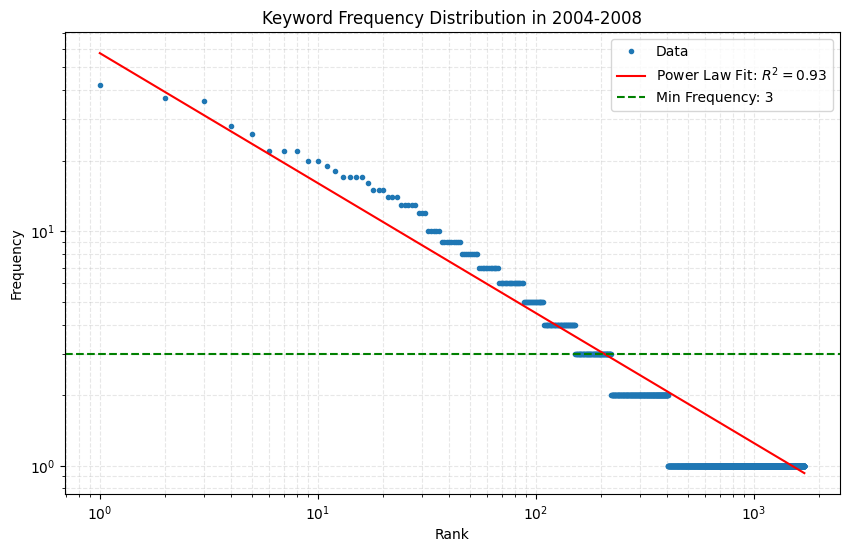

Folder: 2009-2013
Number of unique keywords: 2541
Maximum frequency: 77
Minimum frequency following power law: 5
R-squared: 0.93
Coverage percentage: 100.00%
Number of documents covered: 155 out of 155


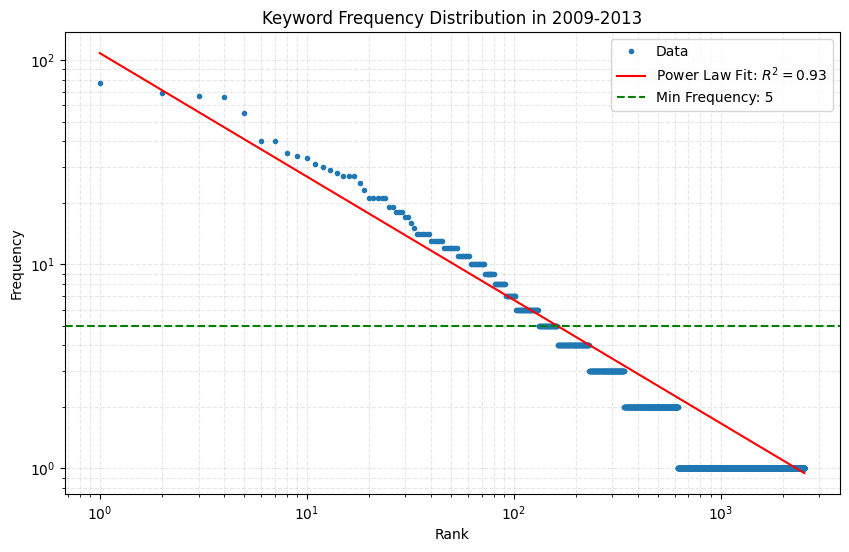

Folder: 2014-2018
Number of unique keywords: 3409
Maximum frequency: 86
Minimum frequency following power law: 6
R-squared: 0.90
Coverage percentage: 100.00%
Number of documents covered: 181 out of 181


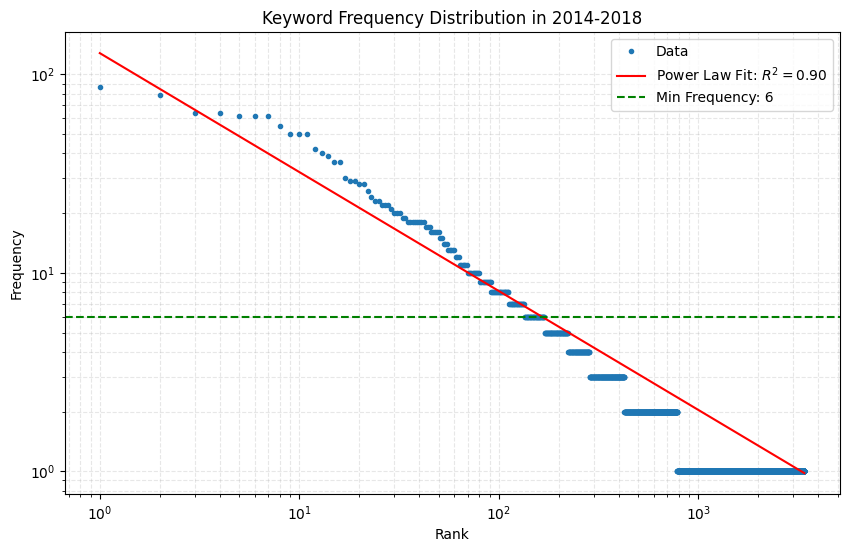

Folder: 2019-2023
Number of unique keywords: 2843
Maximum frequency: 67
Minimum frequency following power law: 4
R-squared: 0.92
Coverage percentage: 98.60%
Number of documents covered: 141 out of 143


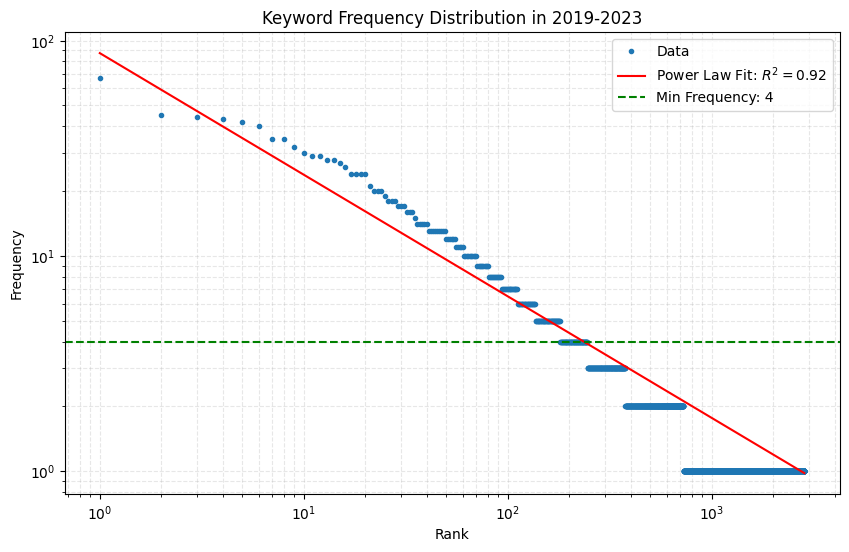

Final keyword set for folder '2004-2008':
Number of unique keywords: 221
basic search
author tool accessibility guideline
personalization
industry
screen reader
context
quality
good practice
text transcoder
effort
model
strategy
factor
accessibility support
environment
standard
set
text
semantic web
information communication technology
transformation
knowledge
mobile device
integrate management system accessforall metadata
activity
statistical graph
change
information
experience
feature
audience
content adaptation
number
simplification
age community
difference
wretch blog
awareness
senior citizen
web design framework improved accessibility people disability
cascade style sheet
quality assessment
flash
addition
web ontology language
account
metric
people with disabilities
accessibility guidelines
need
site
effect
diversity
audio
proof
unix linux
problem
dynamic web page
user agent
technique
mouse
extensible stylesheet language transformation
asynchronous javascript extensible markup lan

In [19]:
#exploratory analysis: keyword frequency distribution code
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp

final_keyword_sets = {}

def power_law(x, a, b):
    return a * np.power(x, b)

def plot_keyword_frequencies(keyword_sets, document_keywords):
    for folder_name, keyword_counts in keyword_sets.items():
        sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
        frequencies = np.array([count for keyword, count in sorted_keywords])
        ranks = np.arange(1, len(frequencies) + 1)
        
        popt, _ = curve_fit(power_law, ranks, frequencies)
        fitted_frequencies = power_law(ranks, *popt)
        
        residuals = frequencies - fitted_frequencies
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((frequencies - np.mean(frequencies))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        ks_statistics = []
        for i in range(1, len(frequencies)):
            ks_stat, _ = ks_2samp(frequencies[:i], fitted_frequencies[:i])
            ks_statistics.append(ks_stat)
        
        threshold_index = np.argmin(ks_statistics)
        min_frequency_following_power_law = frequencies[threshold_index]
        final_keyword_set = {keyword for keyword, count in sorted_keywords if count >= min_frequency_following_power_law}
        final_keyword_sets[folder_name] = final_keyword_set
        
        total_documents = len(document_keywords[folder_name])
        covered_documents = sum(1 for doc_keywords in document_keywords[folder_name] if any(keyword in final_keyword_set for keyword in doc_keywords))
        coverage_percentage = (covered_documents / total_documents) * 100
        
        plt.figure(figsize=(10, 6))
        plt.loglog(ranks, frequencies, marker='o', linestyle='none', markersize=3, label='Data')
        plt.loglog(ranks, fitted_frequencies, linestyle='-', color='red', label=f'Power Law Fit: $R^2 = {r_squared:.2f}$')
        plt.axhline(y=min_frequency_following_power_law, color='green', linestyle='--', label=f'Min Frequency: {min_frequency_following_power_law}')
        plt.xlabel('Rank')
        plt.ylabel('Frequency')
        plt.title(f'Keyword Frequency Distribution in {folder_name}')
        plt.legend()
        plt.grid(True, which="both", ls="--", alpha=0.3)
        
        print(f"Folder: {folder_name}")
        print(f"Number of unique keywords: {len(frequencies)}")
        print(f"Maximum frequency: {max(frequencies)}")
        print(f"Minimum frequency following power law: {min_frequency_following_power_law}")
        print(f"R-squared: {r_squared:.2f}")
        print(f"Coverage percentage: {coverage_percentage:.2f}%")
        print(f"Number of documents covered: {covered_documents} out of {total_documents}")
        
        plt.show()

plot_keyword_frequencies(keyword_sets, document_keywords)
for folder_name, keyword_set in final_keyword_sets.items():
    print(f"Final keyword set for folder '{folder_name}':")
    print(f"Number of unique keywords: {len(keyword_set)}")
    for keyword in keyword_set:
        print(keyword)
    print()

**RQ1**

In [20]:
#RQ1: keyword co-occurrence matrix creation code
import pandas as pd

def create_co_occurrence_matrix(keywords, documents):
    keyword_to_index = {keyword: idx for idx, keyword in enumerate(keywords)}
    
    matrix = np.zeros((len(keywords), len(keywords)), dtype=int)
    
    for doc_keywords in documents:
        doc_keywords_list = list(doc_keywords)
        for i, keyword1 in enumerate(doc_keywords_list):
            if keyword1 in keyword_to_index:
                idx1 = keyword_to_index[keyword1]
                for keyword2 in doc_keywords_list[i+1:]:
                    if keyword2 in keyword_to_index:
                        idx2 = keyword_to_index[keyword2]
                        matrix[idx1, idx2] += 1
                        matrix[idx2, idx1] += 1
    
    df = pd.DataFrame(matrix, index=keywords, columns=keywords)
    return df
co_occurrence_matrices ={}
for folder_name, keyword_set in final_keyword_sets.items():
    print(f"Creating co-occurrence matrix for folder '{folder_name}':")
    
    keywords_list = list(keyword_set)
    
    documents = document_keywords.get(folder_name, [])
    
    co_occurrence_matrices[folder_name] = create_co_occurrence_matrix(keywords_list, documents)
    
    print(f"Co-occurrence matrix shape: {co_occurrence_matrices[folder_name].shape}")
    print(co_occurrence_matrices[folder_name].head())
    print("\n" + "="*50 + "\n")



Creating co-occurrence matrix for folder '2004-2008':
Co-occurrence matrix shape: (221, 221)
                                     basic search  \
basic search                                    0   
author tool accessibility guideline             0   
personalization                                 0   
industry                                        0   
screen reader                                   0   

                                     author tool accessibility guideline  \
basic search                                                           0   
author tool accessibility guideline                                    0   
personalization                                                        0   
industry                                                               0   
screen reader                                                          0   

                                     personalization  industry  screen reader  \
basic search                                      

In [21]:
#RQ1: hierarchical clustering code
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

def perform_hierarchical_clustering(co_occurrence_matrices, cluster_labels_dict, output_dir='clustering_results', impactful_clusters={'2004-2008':[],'2009-2013':[],'2014-2018':[],'2019-2023':[]}):
    os.makedirs(output_dir, exist_ok=True)
    results = {}

    for folder_name, co_occurrence_matrix in co_occurrence_matrices.items():
        print(f"Processing folder '{folder_name}':")
        matrix = co_occurrence_matrix.values
        np.fill_diagonal(matrix, 0)
        dist_matrix = pdist(matrix, metric='euclidean')
        linkage_matrix = linkage(dist_matrix, method='ward', optimal_ordering=True)

        def llf(id):
            return co_occurrence_matrix.index[id]

        thresholds = {
            '2004-2008': 24,
            '2019-2023': 27,
            '2014-2018': 29,
            '2009-2013': 28
        }

        t = thresholds.get(folder_name)
        if t is not None:
            plt.figure(figsize=(20, 10))
            R = dendrogram(
                linkage_matrix,
                leaf_rotation=90.,
                leaf_font_size=8.,
                labels=co_occurrence_matrix.index,
                leaf_label_func=llf,
                color_threshold=t
            )

            plt.title(f'Hierarchical Clustering Dendrogram - {folder_name}')
            plt.xlabel('Keywords')
            plt.ylabel('Distance')
            plt.axhline(y=t, color='r', linestyle='--')
            ax = plt.gca()
            ticks = np.append(ax.get_yticks(), t)
            ax.set_yticks(np.sort(ticks))
            cluster_labels = R['leaves_color_list']
            unique_colors = list(dict.fromkeys([color for color in cluster_labels if color != 'C0']))
            color_to_cluster = {color: label for color, label in zip(unique_colors, cluster_labels_dict[folder_name])}

            legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f"{label}*" if label in impactful_clusters[folder_name] else label,
                                          markerfacecolor=color, markersize=10)
                               for color, label in color_to_cluster.items()]
            
            loc = 'upper right' if folder_name == '2014-2018' else 'upper left'
            plt.legend(handles=legend_elements, loc=loc, ncol=1)
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'{folder_name}_dendrogram_split_{t}.png'), dpi=300, bbox_inches='tight')
            plt.close()

            results[folder_name] = {
                'linkage_matrix': linkage_matrix,
                'cluster_labels': cluster_labels,
                'color_to_cluster': color_to_cluster,
                'leaf_order': R['leaves']
            }

        print(f"Processed folder '{folder_name}'")
        print("=" * 50)

    return results

def get_cluster_words(co_occurrence_matrix, cluster_labels, color_to_cluster, leaf_order):
    cluster_dict = defaultdict(list)
    for idx, color in enumerate(cluster_labels):
        if color in color_to_cluster:
            word = co_occurrence_matrix.index[leaf_order[idx]]
            cluster_num = color_to_cluster[color]
            cluster_dict[f'Cluster {cluster_num}'].append(word)
    return dict(cluster_dict)

cluster_labels_dict = {
    '2004-2008': ['Web 2.0 and Rich Internet Applications for Accessibility','Web Accessibility Standards, Tools, and Challenges','Mobile Web Accessibility and Content Adaptation Strategies','Web Accessibility Evaluation and Regulation','Web Accessibility Standards and Frameworks','Screen Reader Accessibility for Blind & Visually Impaired Users', 'Usability and Semantic Web Accessibility', 'Universal Design Principles for Web Accessibility', 'User-Centered Design Approaches for Web Accessibility'],
    '2009-2013': ['Visual and Haptic Information Accessibility Technologies','Web Accessibility Standards, Evaluation, and Development','Screen Reader Accessibility for Blind & Visually Impaired Users','Dynamic and Interactive Web Content Accessibility (AJAX and Web 2.0)','Cognitive Accessibility and Readability in Web Design','Web Accessibility Evaluation and Design Challenges'],
    '2014-2018': ['Screen Reader Accessibility for Blind & Visually Impaired Users','Evolving Web Accessibility Standards and Technologies','Universal Design Principles for Web Accessibility','Web Content Accessibility','Educational Web Accessibility: Challenges and Solutions','Web Accessibility Evaluation Methods and Metrics','Wearable and Mobile Accessibility Technologies'],
    '2019-2023': ['Web Accessibility Evaluation Metrics','Pandemic-Era Web Accessibility Solutions','AI and Machine Learning in Web Accessibility','Screen Reader Accessibility and Data Visualization','Multimedia Accessibility for Deaf and Hard of Hearing','Fundamental Web Accessibility Tools','Web Content Accessibility and Assistive Technologies','Web Design for Enhanced Accessibility','User-Centered Approaches in Web Accessibility']
}

clustering_results = perform_hierarchical_clustering(co_occurrence_matrices, cluster_labels_dict)

for folder_name, result in clustering_results.items():
    co_occurrence_matrices[folder_name].to_csv(os.path.join('clustering_results', f'{folder_name}_clustered.csv'))
    cluster_words = get_cluster_words(co_occurrence_matrices[folder_name],
                                      result['cluster_labels'],
                                      result['color_to_cluster'],
                                      result['leaf_order'])
    print(f"\nCluster keywords for {folder_name}:")
    for custom_label, words in cluster_words.items():
        custom_label = custom_label.replace('Cluster ', '')
        print(f"{custom_label}: {words}")
    print("=" * 50)

print("Clustering completed for all folders.")

Processing folder '2004-2008':
Processed folder '2004-2008'
Processing folder '2009-2013':
Processed folder '2009-2013'
Processing folder '2014-2018':
Processed folder '2014-2018'
Processing folder '2019-2023':
Processed folder '2019-2023'

Cluster keywords for 2004-2008:
Web 2.0 and Rich Internet Applications for Accessibility: ['web browser', 'web developer', 'solution', 'application', 'web 2.0', 'accessible rich internet application', 'toolkit', 'live region', 'accessibility support', 'google maps', 'asynchronous javascript extensible markup language', 'user agent']
Web Accessibility Standards, Tools, and Challenges: ['hypertext markup language', 'set', 'world wide web consortium', 'assistive technology', 'content management system', 'blog', 'author tool accessibility guideline', 'user agent accessibility guideline', 'technology', 'process', 'implementation', 'strategy', 'industry', 'opportunity', 'age community', 'accessibility need', 'activity', 'senior citizen', 'project', 'devel

**RQ2**

In [22]:
# RQ2: preprocessing code to get the list of DOIs and titles from the corpus
def extract_doi_from_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()   
        doi_elem = root.find(".//book-part/book-part-meta/book-part-id[@book-part-id-type='doi']")
        doi = doi_elem.text if doi_elem is not None else None
        title_group = root.find(".//book-part/book-part-meta/title-group")
        title = remove_italic_tags(title_group.find("title"))
        title = title.replace("\n", "").strip()
        title = title.replace("\t", "").strip()
        return doi,title
    except ET.ParseError:
        print(f"Error parsing {xml_file}")
    except ValueError:
        print(f"Invalid year in {xml_file}")
    return None, None

dois_titles = {}

for folder_name in os.listdir(dest_dir):
    folder_path = os.path.join(dest_dir, folder_name)
    if os.path.isdir(folder_path):
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".xml"):
                    xml_file = os.path.join(root, file)
                    doi,title = extract_doi_from_xml(xml_file)
                    if doi:
                        dois_titles[doi] = title
                    else:
                        print(f"Duplicate DOI found for '{title}' in '{folder_name}'")


print(dois_titles)
    

{'10.1145/1061811.1061813': "What's the web like if you can't see it?", '10.1145/1061811.1061814': 'Do text transcoders improve usability for disabled users?', '10.1145/1061811.1061815': 'AcceSS', '10.1145/1061811.1061816': 'Extracting content from accessible web pages', '10.1145/1061811.1061818': 'Interdependent components of web accessibility', '10.1145/1061811.1061819': 'Web composition with WCAG in mind', '10.1145/1061811.1061820': 'Forcing standardization or accommodating diversity?', '10.1145/1061811.1061821': 'An active step toward a web content accessible society', '10.1145/1061811.1061823': 'Is accessible design a myth?', '10.1145/1061811.1061824': 'Platform-independent accessibility API', '10.1145/1061811.1061825': 'Designing learning systems to provide accessible services', '10.1145/1061811.1061826': 'Automatic accessibility evaluation of dynamic web pages generated through XSLT', '10.1145/1061811.1061828': 'A conceptual framework for accessibility tools to benefit users wit

In [35]:
#RQ2: code to fetch citation data from ACM Digital Library
import requests
import time
import csv
from lxml import etree

base_url = "https://dl.acm.org/action/ajaxShowCitedBy?doi="

def extract_citation_info(html_content):
    parser = etree.HTMLParser()
    tree = etree.fromstring(html_content, parser)
    
    year_counts = defaultdict(int)
    
    reference_spans = tree.xpath("//span[@class='references__note']")
    
    for span in reference_spans:
        year = None
        pub_year = span.xpath(".//span[@class='pub-year']/text()")
        if pub_year:
            year_match = re.search(r'\((\d{4})\)', pub_year[0])
            if year_match:
                year = int(year_match.group(1))
        
        if not year:
            article_title = span.xpath(".//span[@class='references__article-title']/text()")
            if article_title:
                following_text = span.xpath(".//span[@class='references__article-title']/following-sibling::text()")
                if following_text:
                    text = ' '.join(following_text)
                    year_match = re.search(r'Proceedings of the (\d{4})', text)
                    if year_match:
                        year = int(year_match.group(1))
        
        if year:
            if 2004 <= year <= 2008:
                year_counts['2004-2008'] += 1
            elif 2009 <= year <= 2013:
                year_counts['2009-2013'] += 1
            elif 2014 <= year <= 2018:
                year_counts['2014-2018'] += 1
            elif 2019 <= year <= 2023:
                year_counts['2019-2023'] += 1   
    return year_counts

with open('citation_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'DOI', '2004-2008', '2009-2013', '2014-2018', '2019-2023']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for doi, title in dois_titles.items():
        url = base_url + doi
        try:
            response = requests.get(url)
            response.raise_for_status()        
            year_counts = extract_citation_info(response.text)
            
            row_data = {
                'Title': title,
                'DOI': doi,
                '2004-2008': year_counts['2004-2008'],
                '2009-2013': year_counts['2009-2013'],
                '2014-2018': year_counts['2014-2018'],
                '2019-2023': year_counts['2019-2023']
            }
            
            writer.writerow(row_data)
            
            print(f"Processed DOI: {doi}")
            print(f"Citation counts: {year_counts}")
            time.sleep(1)
        
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for DOI {doi}: {e}")
        
        except Exception as e:
            print(f"Error processing data for DOI {doi}: {e}")

print("CSV file 'citation_data.csv' has been created with the citation data.")

Processed DOI: 10.1145/1061811.1061813
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 15, '2014-2018': 5, '2009-2013': 12, '2004-2008': 5})
Processed DOI: 10.1145/1061811.1061814
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 1, '2009-2013': 2, '2004-2008': 2, '2014-2018': 0})
Processed DOI: 10.1145/1061811.1061815
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 5, '2014-2018': 2, '2009-2013': 1, '2004-2008': 9})
Processed DOI: 10.1145/1061811.1061816
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 7, '2014-2018': 6, '2009-2013': 9, '2004-2008': 10})
Processed DOI: 10.1145/1061811.1061818
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 2, '2014-2018': 7, '2009-2013': 3, '2004-2008': 7})
Processed DOI: 10.1145/1061811.1061819
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 1, '2014-2018': 2, '2009-2013': 2, '2004-2008': 0})
Processed DOI: 10.1145/1061811.1061820
Citation counts: defaultdict(<class 'int'>, {'2019-2023': 4, '20

Citation count threshold (25th most cited paper): 30
Number of papers with 30 or more citations: 25
Updated CSV file saved as 'citation_data.csv'
Plot has been saved as 'citation_trends.png'


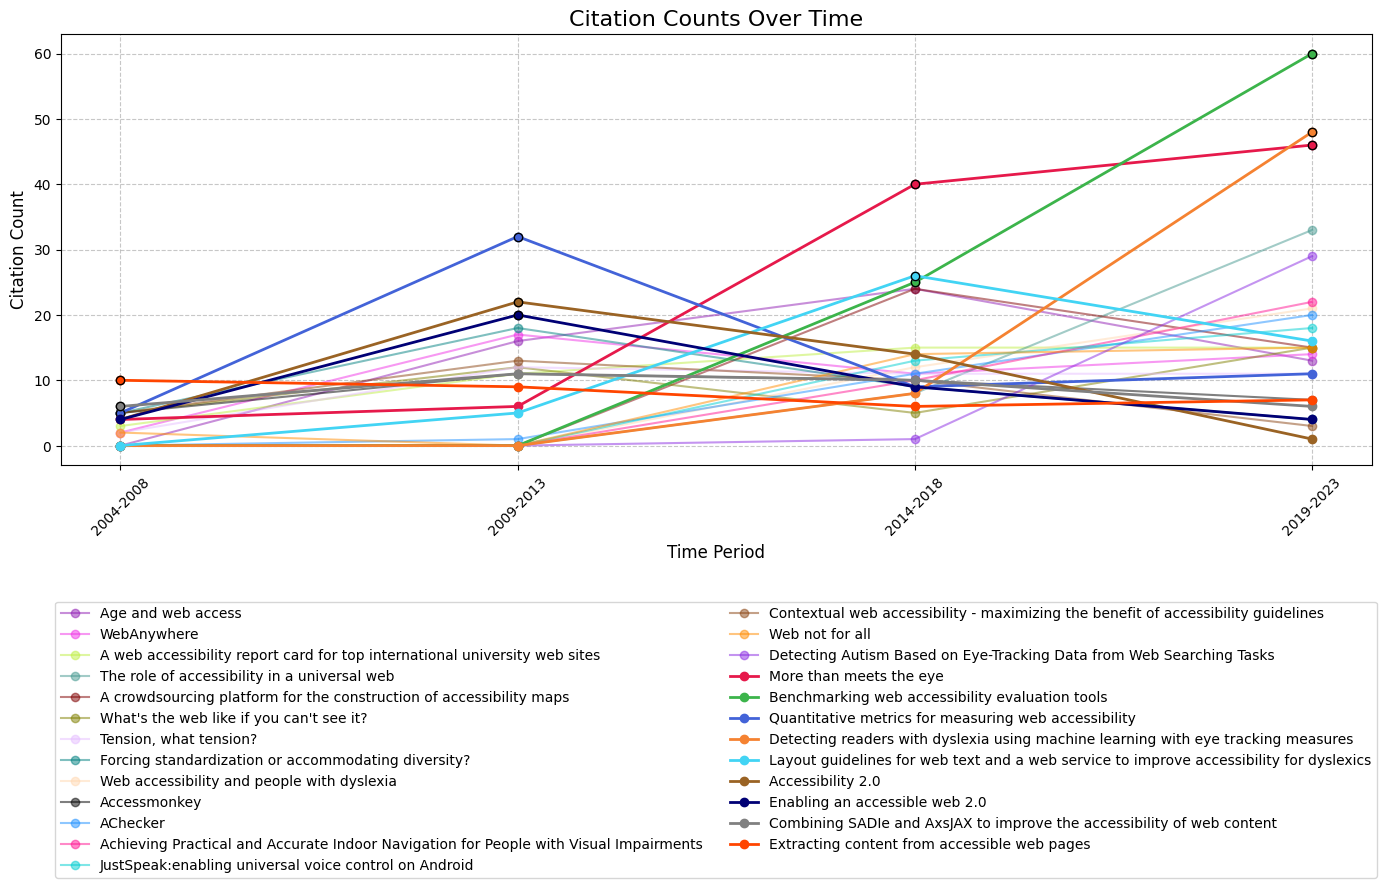

In [27]:
#RQ2: code to analyse citation data and plot citation trends
df = pd.read_csv('citation_data.csv')
citation_columns = ['2004-2008', '2009-2013', '2014-2018', '2019-2023']
df['Total'] = df[citation_columns].sum(axis=1)
df_sorted = df.sort_values('Total', ascending=False).drop_duplicates().reset_index(drop=True)
threshold = df_sorted.loc[24, 'Total'] 
print(f"Citation count threshold (25th most cited paper): {threshold}")
df_filtered = df_sorted[df_sorted['Total'] >= threshold]
df_filtered.loc[df_filtered["Title"].isna() | (df_filtered["Title"] == ""), "Title"] = "JustSpeak:enabling universal voice control on Android"
df_filtered = df_filtered.reset_index(drop=True)
print(f"Number of papers with {threshold} or more citations: {len(df_filtered)}")

def determine_impact_category(citations):
    max_index = citations.index(max(citations))
    max_value = max(citations)
    if citations[3] > citations[2] >= citations[1] >= citations[0]:
        return 'Increasing'
    elif max_index < 3 and citations[max_index + 1] <= citations[max_index] * 0.6:
        return 'Ephemeral'
    elif max_index < 3 and all(citations[i] < citations[i-1] for i in range(max_index + 1, 4)):
        return 'Decreasing'
    elif max_index < 3 and (max(citations[max_index+1:]) - min(citations[max_index+1:])) <= 0.5 * max_value:
        return 'Plateau'
    else:
        return 'Plateau'

for index, row in df_filtered.iterrows():
    citations = [row[period] for period in citation_columns]
    df_filtered.loc[index, 'Impact Category'] = determine_impact_category(citations)

df_filtered.to_csv('citation_data.csv', index=False)
print("Updated CSV file saved as 'citation_data.csv'")

periods = ['2004-2008', '2009-2013', '2014-2018', '2019-2023']
x = range(len(periods))
plt.figure(figsize=(15, 10))
top_papers = {period: set(df_filtered.nlargest(3, period)['Title']) for period in periods}

distinct_colors = ['#e6194B', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#469990', '#9A6324','#800000', '#808000', '#000075', '#e6beff', '#008080','#ffd8b1', '#000000', '#808080', '#ff4500', '#1e90ff', '#ff1493', '#00ced1', '#8b4513', '#ff8c00', '#8a2be2']

for index, row in df_filtered.iterrows():
    if not any(row['Title'] in top_papers[period] for period in periods):
        y = [int(row[period]) for period in periods]
        title = str(row['Title'])
        color = distinct_colors[index % len(distinct_colors)]
        plt.plot(x, y, marker='o', label=title, color=color, alpha=0.5)

for index, row in df_filtered.iterrows():
    if any(row['Title'] in top_papers[period] for period in periods):
        y = [int(row[period]) for period in periods]
        title = str(row['Title'])
        color = distinct_colors[index % len(distinct_colors)]
        line, = plt.plot(x, y, marker='o', label=title, color=color, linewidth=2)
        for i, period in enumerate(periods):
            if title in top_papers[period]:
                plt.plot(i, y[i], marker='o', markerfacecolor=line.get_color(), markeredgecolor='black', markeredgewidth=1)

plt.title('Citation Counts Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Citation Count', fontsize=12)
plt.xticks(x, periods, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig('citation_trends.png', dpi=300, bbox_inches='tight')
print("Plot has been saved as 'citation_trends.png'")

Plot has been saved as 'cumulative_citation_trends.png'


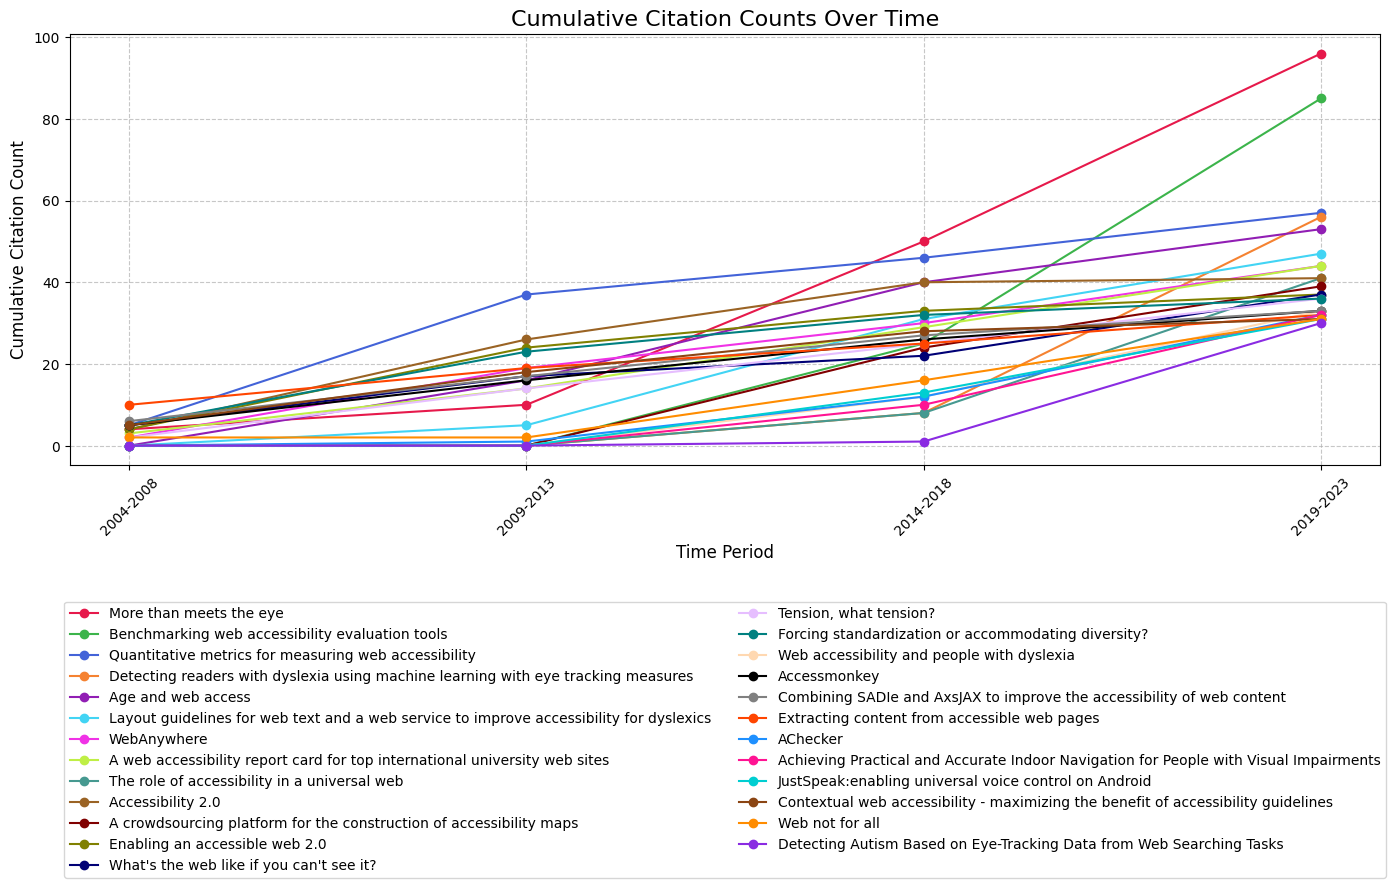

In [ ]:
for i in range(1, len(citation_columns)):
    df_filtered[citation_columns[i]] = df_filtered[citation_columns[i]] + df_filtered[citation_columns[i-1]]

periods = citation_columns
x = range(len(periods))
plt.figure(figsize=(15, 10))

distinct_colors = ['#e6194B', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#469990', '#9A6324','#800000', '#808000', '#000075', '#e6beff', '#008080','#ffd8b1', '#000000', '#808080', '#ff4500', '#1e90ff', '#ff1493', '#00ced1', '#8b4513', '#ff8c00', '#8a2be2']

for index, row in df_filtered.iterrows():
    y = [int(row[period]) for period in periods]
    title = str(row['Title'])
    color = distinct_colors[index % len(distinct_colors)]
    plt.plot(x, y, marker='o', label=title, color=color)

plt.title('Cumulative Citation Counts Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cumulative Citation Count', fontsize=12)
plt.xticks(x, periods, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig('cumulative_citation_trends.png', dpi=300, bbox_inches='tight')
print("Plot has been saved as 'cumulative_citation_trends.png'")

In [30]:
#RQ2: code to identify impactful papers and clusters
impactful_papers_paths = {}

for period, papers in top_papers.items():
    impactful_papers_paths[period] = []
    for folder_name in os.listdir(dest_dir):
        folder_path = os.path.join(dest_dir, folder_name)
        if os.path.isdir(folder_path):
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    if file.endswith(".xml"):
                        xml_file = os.path.join(root, file)
                        tree = ET.parse(xml_file)
                        r = tree.getroot()      
                        title_group = r.find(".//book-part/book-part-meta/title-group")
                        title = remove_italic_tags(title_group.find("title"))
                        title = title.replace("\n", "").strip()
                        title = title.replace("\t", "").strip()
                        if title in papers:
                            impactful_papers_paths[period].append(xml_file)

impactful_kw_sets = {}
for period, paths in impactful_papers_paths.items():
    kw_set = []
    for path in paths:
        kw = extract_text_from_xml(path)
        kw_set.extend(kw)
    kw_set = replace_synonyms(kw_set, synonyms)
    impactful_kw_sets[period] = [kw for kw in kw_set if kw in final_keyword_sets[period]]

impactful_clusters = {}

for folder_name, result in clustering_results.items():
    impactful_clusters[folder_name] = []   
    cluster_words = get_cluster_words(co_occurrence_matrices[folder_name],result['cluster_labels'], result['color_to_cluster'], result['leaf_order'])
    for custom_label, words in cluster_words.items():
        custom_label = custom_label.replace('Cluster ', '')       
        impact_score = sum(word in impactful_kw_sets[folder_name] for word in words)
        threshold = int(len(impactful_kw_sets[folder_name]) * 0.09)
        if impact_score >= threshold:
            impactful_clusters[folder_name].append(custom_label)

            
for period,clusters in impactful_clusters.items():
    print(f"Period: {period}")
    print(f"Number of impactful keywords: {len(impactful_kw_sets[period])}")
    print(f"Number of impactful clusters: {len(clusters)}")
    print(f"Impactful Clusters: {clusters}")
    print()      

updated_clustering_results = perform_hierarchical_clustering(co_occurrence_matrices,cluster_labels_dict, output_dir='impactful_clustering_results',impactful_clusters=impactful_clusters)

Period: 2004-2008
Number of impactful keywords: 57
Number of impactful clusters: 3
Impactful Clusters: ['Web Accessibility Standards, Tools, and Challenges', 'Mobile Web Accessibility and Content Adaptation Strategies', 'Screen Reader Accessibility for Blind & Visually Impaired Users']

Period: 2009-2013
Number of impactful keywords: 37
Number of impactful clusters: 3
Impactful Clusters: ['Visual and Haptic Information Accessibility Technologies', 'Screen Reader Accessibility for Blind & Visually Impaired Users', 'Cognitive Accessibility and Readability in Web Design']

Period: 2014-2018
Number of impactful keywords: 45
Number of impactful clusters: 3
Impactful Clusters: ['Educational Web Accessibility: Challenges and Solutions', 'Web Accessibility Evaluation Methods and Metrics', 'Wearable and Mobile Accessibility Technologies']

Period: 2019-2023
Number of impactful keywords: 53
Number of impactful clusters: 4
Impactful Clusters: ['Pandemic-Era Web Accessibility Solutions', 'AI and M

In [32]:
#RQ2: code to identify clusters level impact categories
cluster_impact_categories = {"2004-2008": {}, "2009-2013": {}, "2014-2018": {}, "2019-2023": {}}

for index,row in df_filtered.iterrows():
    paper_path = None
    paper_title = row['Title']
    for folder_name in os.listdir(dest_dir):
        folder_path = os.path.join(dest_dir, folder_name)
        if os.path.isdir(folder_path):
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    if file.endswith(".xml"):
                        xml_file = os.path.join(root, file)
                        tree = ET.parse(xml_file)
                        r = tree.getroot()      
                        title_group = r.find(".//book-part/book-part-meta/title-group")
                        title = remove_italic_tags(title_group.find("title"))
                        title = title.replace("\n", "").strip()
                        title = title.replace("\t", "").strip()
                        if title == paper_title:
                            paper_path = xml_file
                            break
                        elif paper_title == "JustSpeak:enabling universal voice control on Android":
                            paper_path = r'data\2014-2018\2596695.2596720.xml'
                            break
    period = paper_path.split('\\')[1]
    df_filtered.loc[index, 'Period'] = period
    kw = extract_text_from_xml(paper_path)
    kw = replace_synonyms(kw, synonyms)
    kw = [keyword for keyword in kw if keyword in final_keyword_sets[period]]
    df_filtered.loc[index, 'Keywords'] = ', '.join(k for k in kw)
    cluster_words = get_cluster_words(co_occurrence_matrices[period],updated_clustering_results[period]['cluster_labels'], updated_clustering_results[period]['color_to_cluster'], updated_clustering_results[period]['leaf_order'])
    labels = []
    for custom_label, words in cluster_words.items():
        custom_label = custom_label.replace('Cluster ', '')
        if any(word in kw for word in words):
            labels.append(custom_label)
            df_filtered.loc[index, 'Clusters'] = ','.join(labels)
    for cluster in labels:
        if cluster not in cluster_impact_categories[period]:
                    cluster_impact_categories[period][cluster] = {}
        impact_category = df_filtered.loc[index, 'Impact Category']
        if impact_category in cluster_impact_categories[period][cluster]:
            cluster_impact_categories[period][cluster][impact_category] += 1
        else:
            cluster_impact_categories[period][cluster][impact_category] = 1

df_filtered.to_csv('citation_data.csv', index=False)
print("Updated CSV file saved as 'citation_data.csv'")

print("Cluster impact categories:")
for period, clusters in cluster_impact_categories.items():
    print(f"Period: {period}")
    for cluster, categories in clusters.items():
        print(f"Cluster: {cluster}")
        for category, count in categories.items():
            print(f"{category}: {count}")
    print()

def create_stacked_bar_chart(period_data, period):
    clusters = list(period_data.keys())
    cluster_labels = [cluster + "*" if cluster in impactful_clusters[period] else cluster for cluster in clusters]
    impact_categories = ['Ephemeral', 'Plateau', 'Decreasing', 'Increasing']

    data = np.array([[period_data[cluster].get(category, 0) for category in impact_categories] for cluster in clusters])
    
    if data.size == 0:
        print(f"No data available for period {period}. Skipping chart generation.")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8))
    bottom = np.zeros(len(clusters))
    
    for i, category in enumerate(impact_categories):
        values = data[:, i]
        ax.bar(range(len(clusters)), values, bottom=bottom, label=category)
        bottom += values
   
    ax.set_title(f'Research Trend Impact Categories - {period}')
    ax.set_xlabel('Research Trend')
    ax.set_ylabel('Number of Papers')
    ax.legend()
    
    ax.set_xticks(range(len(clusters)))
    ax.set_xticklabels(cluster_labels, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig(f'cluster_impacts/cluster_impact_{period}.png')
    plt.close()
    
for period, clusters in cluster_impact_categories.items():
    create_stacked_bar_chart(clusters, period)

print("Stacked bar charts have been saved as PNG files.")

Updated CSV file saved as 'citation_data.csv'
Cluster impact categories:
Period: 2004-2008
Cluster: Web Accessibility Standards, Tools, and Challenges
Ephemeral: 3
Plateau: 3
Decreasing: 3
Cluster: Mobile Web Accessibility and Content Adaptation Strategies
Ephemeral: 3
Plateau: 2
Decreasing: 1
Cluster: Web Accessibility Evaluation and Regulation
Ephemeral: 2
Plateau: 2
Decreasing: 2
Cluster: Screen Reader Accessibility for Blind & Visually Impaired Users
Ephemeral: 2
Plateau: 4
Decreasing: 3
Cluster: Usability and Semantic Web Accessibility
Ephemeral: 3
Plateau: 4
Decreasing: 2
Cluster: Universal Design Principles for Web Accessibility
Plateau: 4
Ephemeral: 1
Decreasing: 1
Cluster: Web Accessibility Standards and Frameworks
Plateau: 1
Decreasing: 1
Cluster: Web 2.0 and Rich Internet Applications for Accessibility
Ephemeral: 1
Plateau: 1

Period: 2009-2013
Cluster: Web Accessibility Standards, Evaluation, and Development
Increasing: 2
Plateau: 2
Decreasing: 1
Cluster: Screen Reader Acce

**RQ3**

In [224]:
#RQ2: code to calculate cluster metrics
def calculate_cluster_metrics(co_occurrence_matrix, cluster_labels, color_to_cluster, leaf_order):
    metrics = {}
    
    for color, cluster_num in color_to_cluster.items():
        cluster_mask = [label == color for label in cluster_labels]
        cluster_keywords = [co_occurrence_matrix.index[leaf_order[i]] for i, mask in enumerate(cluster_mask) if mask]
        
        size = len(cluster_keywords)
        
        cluster_matrix = co_occurrence_matrix.loc[cluster_keywords, cluster_keywords]
        total_co_occurrence = cluster_matrix.where(np.triu(np.ones(cluster_matrix.shape), k=1).astype(bool)).sum().sum()
        
        metrics[cluster_num] = {
            "size": size,
            "total_co_occurrence": total_co_occurrence
        }
    
    return metrics

all_folder_metrics = {}

for folder_name, result in updated_clustering_results.items():
    cluster_metrics = calculate_cluster_metrics(
        co_occurrence_matrices[folder_name],
        result['cluster_labels'],
        result['color_to_cluster'],
        result['leaf_order']
    )
    
    all_folder_metrics[folder_name] = cluster_metrics

for folder_name, folder_metrics in all_folder_metrics.items():
    print(f"\nMetrics for {folder_name}:")
    for cluster_num, metrics in folder_metrics.items():
        print(f"{cluster_num}:")
        print(f"  Size: {metrics['size']}")
        print(f"  Total Co-occurrence: {metrics['total_co_occurrence']:.2f}")
    print("=" * 50)


Metrics for 2004-2008:
Web 2.0 and Rich Internet Applications for Accessibility:
  Size: 12
  Total Co-occurrence: 148.00
Web Accessibility Standards, Tools, and Challenges:
  Size: 79
  Total Co-occurrence: 233.00
Mobile Web Accessibility and Content Adaptation Strategies:
  Size: 76
  Total Co-occurrence: 600.00
Web Accessibility Evaluation and Regulation:
  Size: 15
  Total Co-occurrence: 127.00
Web Accessibility Standards and Frameworks:
  Size: 13
  Total Co-occurrence: 121.00
Screen Reader Accessibility for Blind & Visually Impaired Users:
  Size: 5
  Total Co-occurrence: 34.00
Usability and Semantic Web Accessibility:
  Size: 16
  Total Co-occurrence: 191.00
Universal Design Principles for Web Accessibility:
  Size: 3
  Total Co-occurrence: 21.00
User-Centered Design Approaches for Web Accessibility:
  Size: 2
  Total Co-occurrence: 4.00

Metrics for 2009-2013:
Visual and Haptic Information Accessibility Technologies:
  Size: 65
  Total Co-occurrence: 378.00
Web Accessibility S

C:\Users\Arushi\AppData\Local\Temp\ipykernel_808\3057872220.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


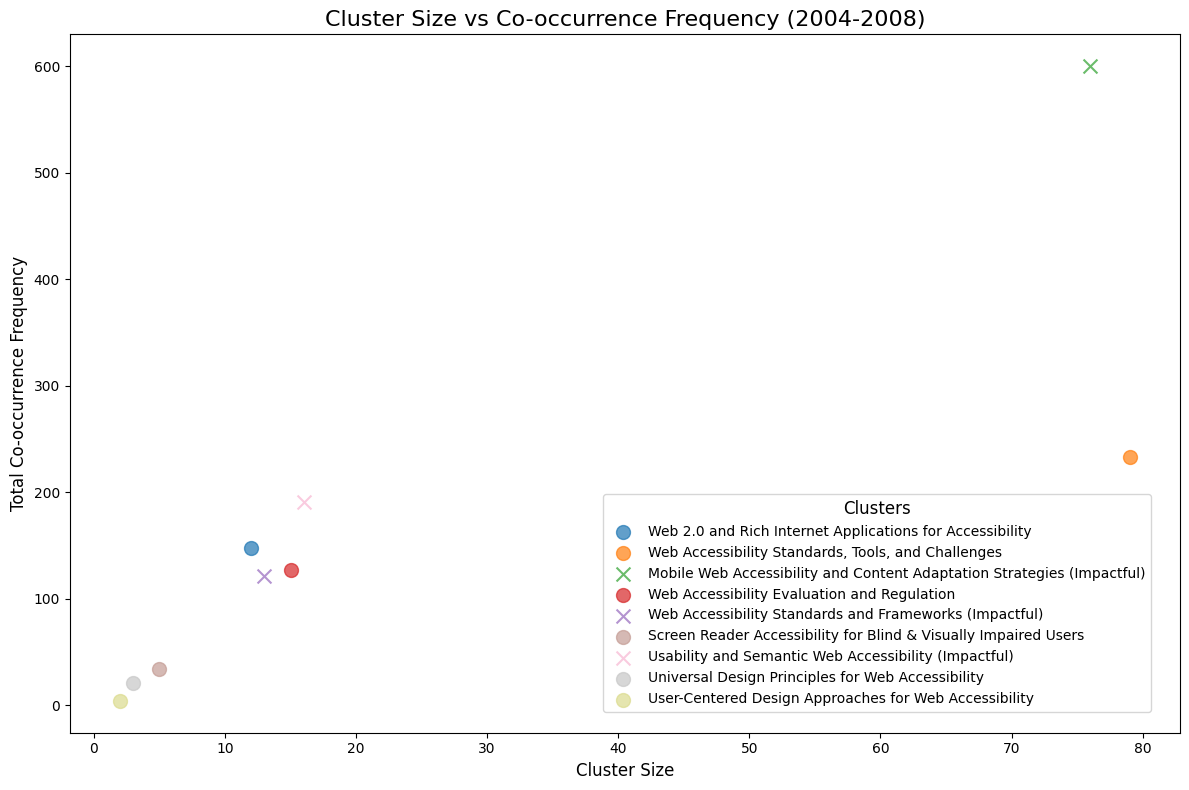

C:\Users\Arushi\AppData\Local\Temp\ipykernel_808\3057872220.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


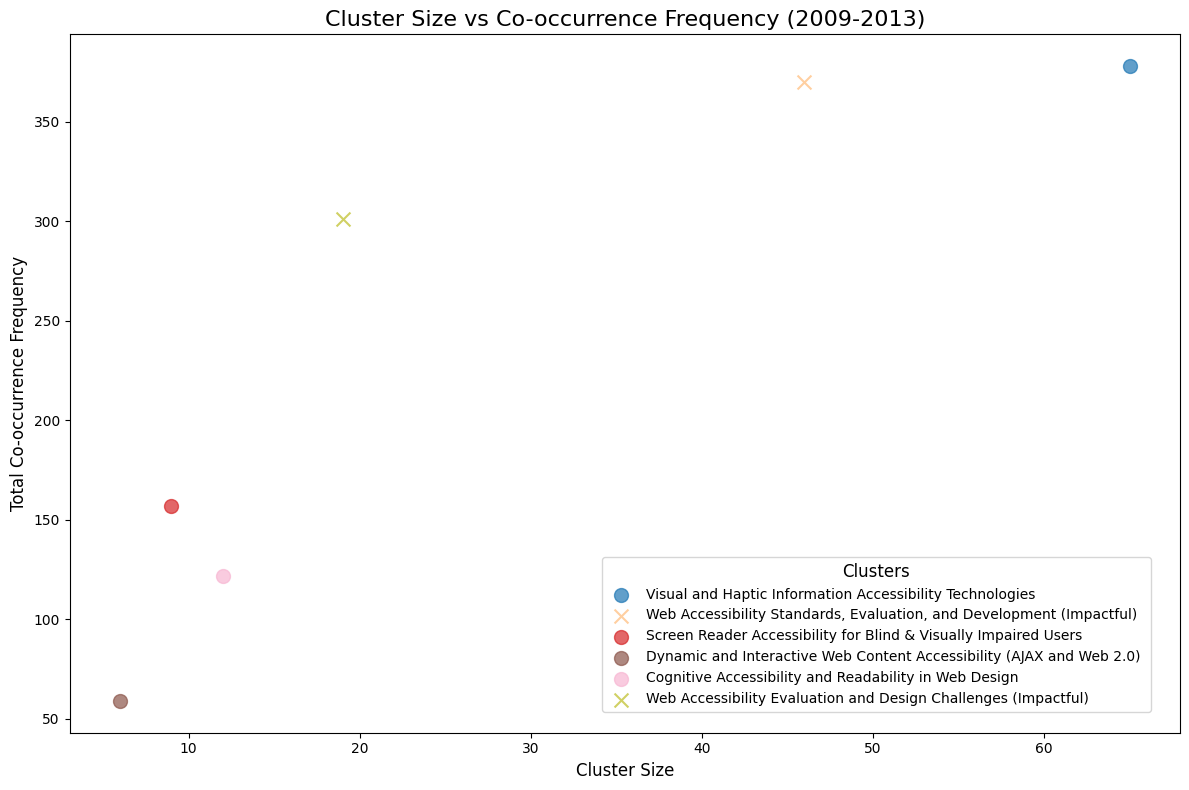

C:\Users\Arushi\AppData\Local\Temp\ipykernel_808\3057872220.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


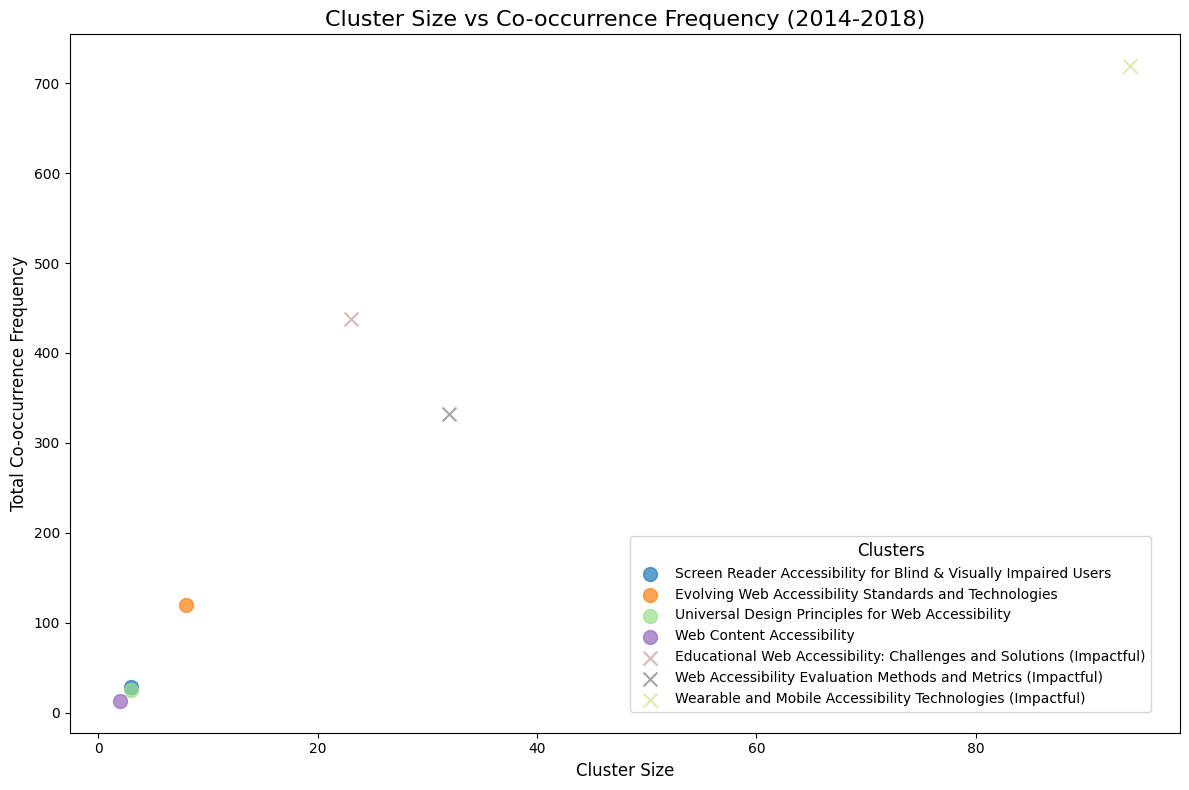

C:\Users\Arushi\AppData\Local\Temp\ipykernel_808\3057872220.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


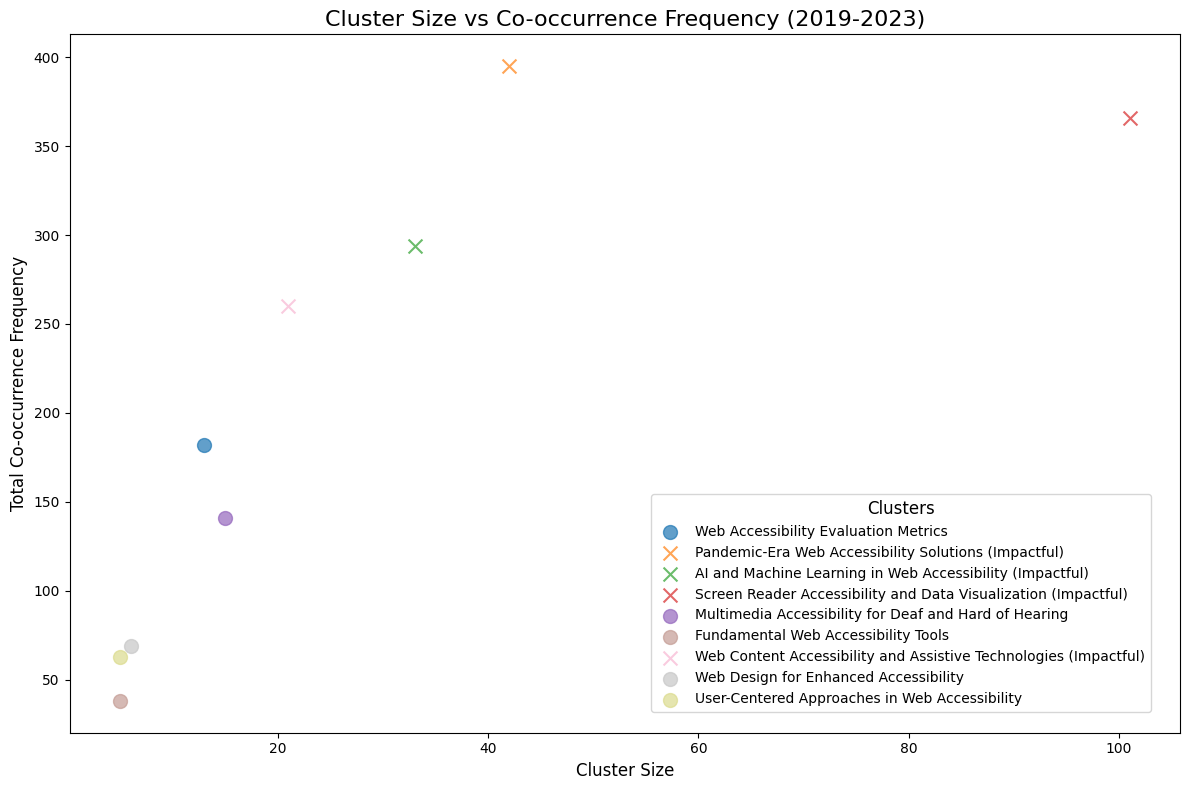

In [225]:
#RQ2: code to plot cluster metrics in scatter plots
dfs = {}
for folder_name, folder_metrics in all_folder_metrics.items():   
    df = pd.DataFrame.from_dict(folder_metrics, orient='index')
    df['is_impactful'] = df.index.isin(impactful_clusters[folder_name])
    dfs[folder_name] = df

def create_scatter_plot(df, impactful_clusters, time_period):
    plt.figure(figsize=(12, 8))
    
    unique_clusters = df.index.unique()
    color_map = plt.cm.get_cmap('tab20')
    colors = {cluster: color_map(i/len(unique_clusters)) for i, cluster in enumerate(unique_clusters)}
    
    for cluster in unique_clusters:
        cluster_data = df.loc[[cluster]]
        is_impactful = cluster in impactful_clusters
        marker = 'x' if is_impactful else 'o'
        plt.scatter(cluster_data['size'], cluster_data['total_co_occurrence'], 
                    color=colors[cluster], marker=marker, s=100, alpha=0.7,
                    label=f'{cluster} {"(Impactful)" if is_impactful else ""}')
    
    plt.title(f'Cluster Size vs Co-occurrence Frequency ({time_period})', fontsize=16)
    plt.xlabel('Cluster Size', fontsize=12)
    plt.ylabel('Total Co-occurrence Frequency', fontsize=12)
    
    plt.legend(title='Clusters', title_fontsize='12', fontsize='10', 
               loc='lower right', bbox_to_anchor=(0.98, 0.02))
    
    plt.tight_layout()
    plt.show()

for time_period, df in dfs.items():
    create_scatter_plot(df, impactful_clusters[time_period], time_period)

C:\Users\Arushi\AppData\Local\Temp\ipykernel_808\4272540327.py:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


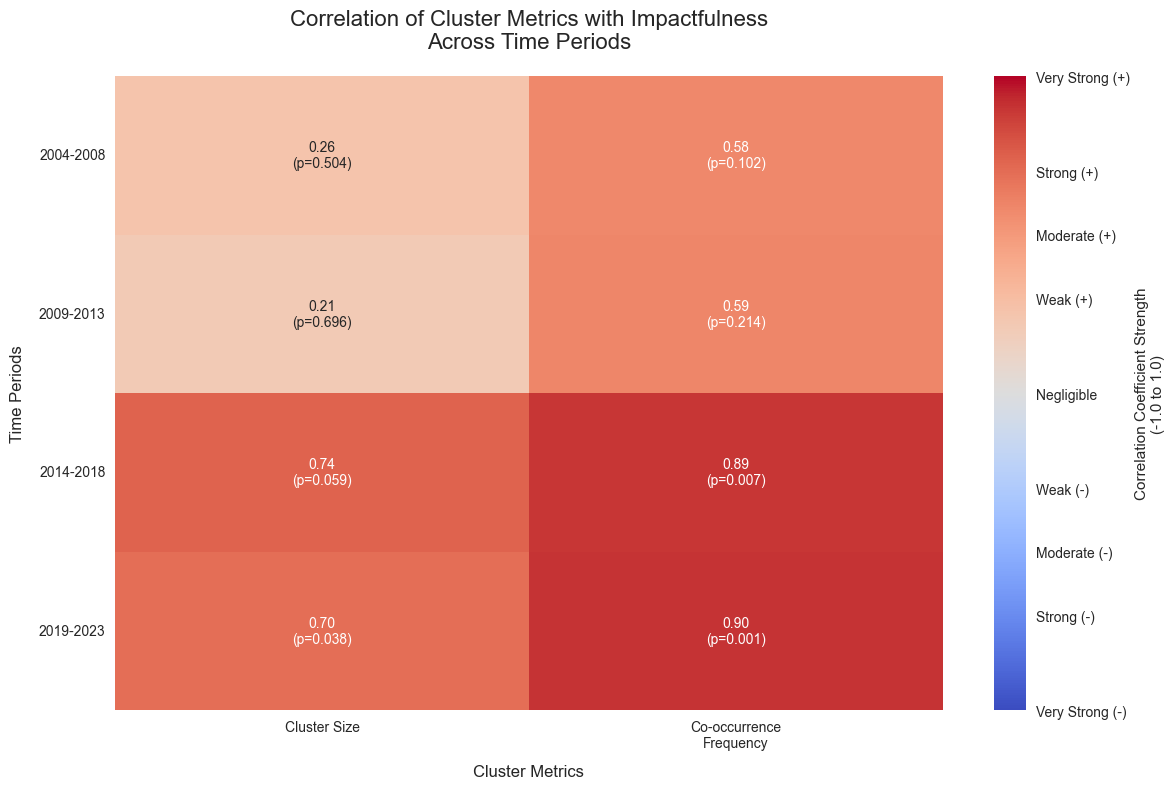

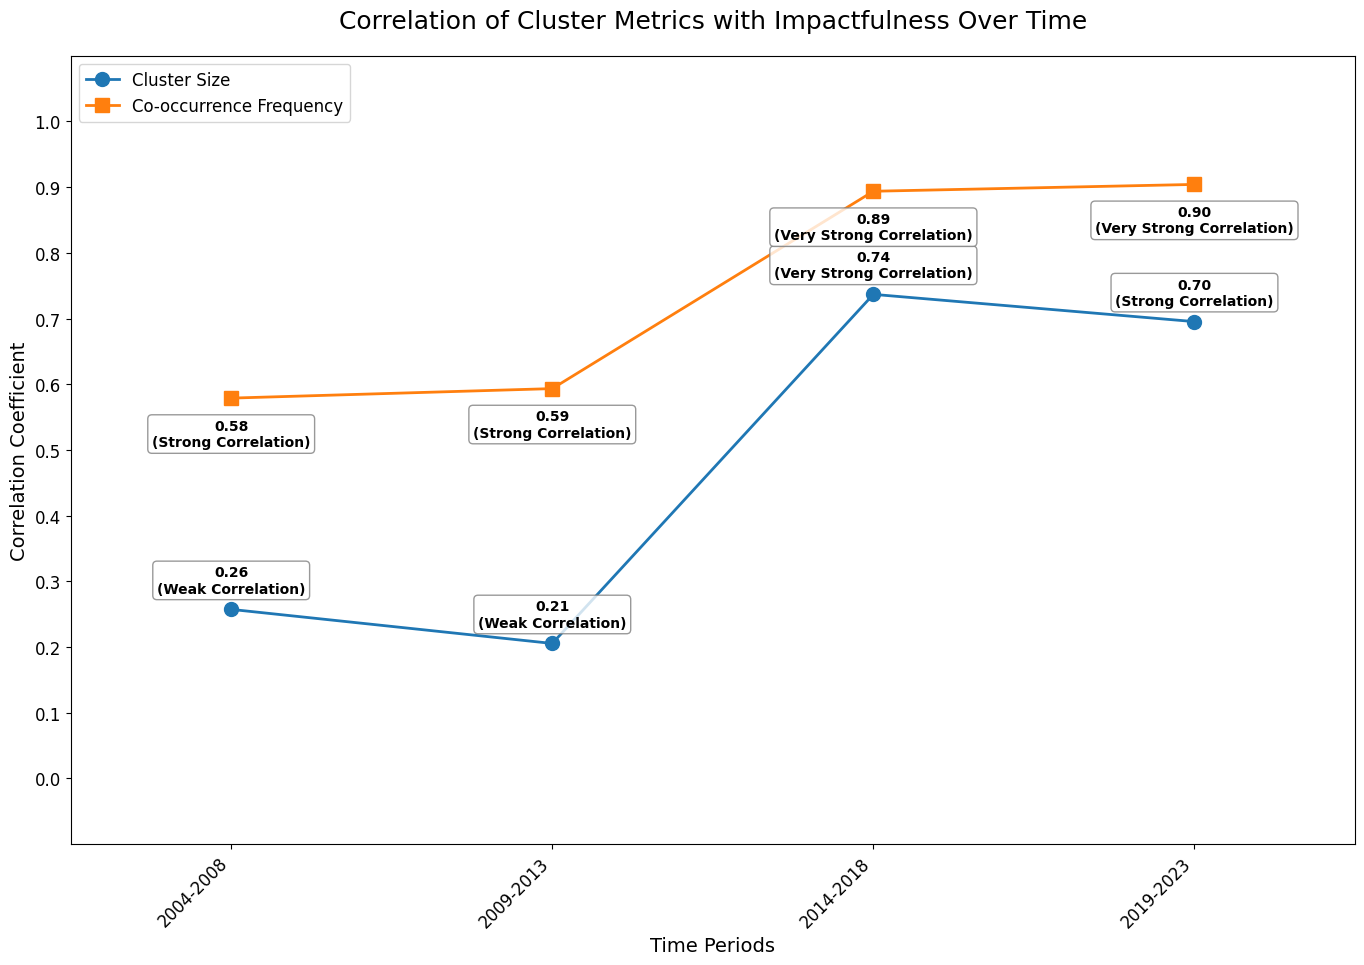

In [226]:
#RQ3: code to calculate correlation between cluster metrics and impactfulness
from scipy import stats
import seaborn as sns

def calculate_correlation(x, y):
    correlation, p_value = stats.pearsonr(x, y) #size and co-occurrence freq treated as continuous variables with vals = vals for each cluster in a period
    return correlation, p_value

correlation_results = {}

for folder_name, df in dfs.items():
    df['is_impactful_int'] = df['is_impactful'].astype(int)
    
    size_corr, size_p = calculate_correlation(df['size'], df['is_impactful_int'])
    cooccur_corr, cooccur_p = calculate_correlation(df['total_co_occurrence'], df['is_impactful_int'])
    
    correlation_results[folder_name] = {
        'size_correlation': size_corr,
        'size_p_value': size_p,
        'co_occurrence_correlation': cooccur_corr,
        'co_occurrence_p_value': cooccur_p
    }

results_df = pd.DataFrame.from_dict(correlation_results, orient='index')
annot_df = results_df[['size_correlation', 'co_occurrence_correlation']].copy()

for folder_name, metrics in correlation_results.items():
    size_corr = metrics['size_correlation']
    size_p = metrics['size_p_value']
    cooccur_corr = metrics['co_occurrence_correlation']
    cooccur_p = metrics['co_occurrence_p_value']
    
    annot_df.loc[folder_name, 'size_correlation'] = f'{size_corr:.2f}\n(p={size_p:.3f})' if not np.isnan(size_corr) else 'N/A'
    annot_df.loc[folder_name, 'co_occurrence_correlation'] = f'{cooccur_corr:.2f}\n(p={cooccur_p:.3f})' if not np.isnan(cooccur_corr) else 'N/A'

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(results_df[['size_correlation', 'co_occurrence_correlation']],annot=annot_df.values, fmt='', cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient Strength\n(-1.0 to 1.0)'}, ax=ax)

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.7, -0.5, -0.3, 0, 0.3, 0.5, 0.7, 1])
cbar.set_ticklabels(['Very Strong (-)', 'Strong (-)', 'Moderate (-)', 'Weak (-)', 
                     'Negligible', 'Weak (+)', 'Moderate (+)', 'Strong (+)', 'Very Strong (+)'])

ax.set_title('Correlation of Cluster Metrics with Impactfulness\nAcross Time Periods', fontsize=16, pad=20)
ax.set_xlabel('Cluster Metrics', fontsize=12, labelpad=10)
ax.set_ylabel('Time Periods', fontsize=12, labelpad=10)
ax.set_xticklabels(['Cluster Size', 'Co-occurrence\nFrequency'], rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

def interpret_correlation(r):
    if pd.isna(r):
        return "N/A"
    r = abs(r)
    if r < 0.1:
        return "Negligible Correlation"
    elif r < 0.3:
        return "Weak Correlation"
    elif r < 0.5:
        return "Moderate Correlation"
    elif r < 0.7:
        return "Strong Correlation"
    else:
        return "Very Strong Correlation"

plt.style.use('default')
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_facecolor('white')

ax.plot(results_df.index, results_df['size_correlation'], marker='o', label='Cluster Size', linewidth=2, markersize=10)
ax.plot(results_df.index, results_df['co_occurrence_correlation'], marker='s', label='Co-occurrence Frequency', linewidth=2, markersize=10)

ax.set_xlabel('Time Periods', fontsize=14)
ax.set_ylabel('Correlation Coefficient', fontsize=14)
ax.set_title('Correlation of Cluster Metrics with Impactfulness Over Time', fontsize=18, pad=20)
ax.set_ylim(-0.1, 1.1)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_xlim(-0.5, len(results_df.index) - 0.5)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.1)], fontsize=12)
ax.legend(fontsize=12, loc='upper left')

for i, period in enumerate(results_df.index):
    size_corr = results_df.loc[period, "size_correlation"]
    cooccur_corr = results_df.loc[period, "co_occurrence_correlation"]
    
    ax.annotate(f'{size_corr:.2f}\n({interpret_correlation(size_corr)})', 
                (i, size_corr),
                textcoords="offset points", xytext=(0,10), ha='center', va='bottom',
                fontsize=10, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    ax.annotate(f'{cooccur_corr:.2f}\n({interpret_correlation(cooccur_corr)})', 
                (i, cooccur_corr),
                textcoords="offset points", xytext=(0,-15), ha='center', va='top',
                fontsize=10, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(right=0.85, bottom=0.15)
plt.show()